# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
# floyd run --mode jupyter --gpu --env tensorflow-1.0 --data R5KrjnANiKVhLWAkpXhNBe
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

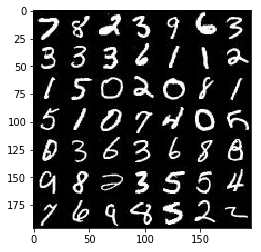

In [2]:
show_n_images = 60

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

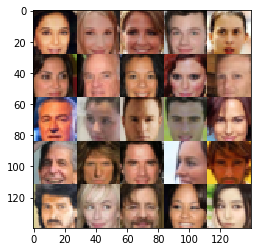

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    #print(image_width)
    #print(image_height)
    #print(image_channels)
    #print(z_dim)
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='inputs_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='inputs_z')
    learning_rate = tf.placeholder(tf.float32, name='lr')

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    #print(images)
    alpha = 0.2
    with tf.variable_scope('discriminator', reuse=reuse):
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d(relu1, 128,5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn3, bn3)
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    #print(z)
    #print(out_channel_dim)
    alpha = 0.1
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 4*4*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 4, 4, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        #print(x1)
        # 4x4x512 now
    
        x2 = tf.layers.conv2d_transpose(x1, 256, 4, strides=1, padding='valid') 
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        #print(x2)
        # 7x7x256 now
    
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # 14x14x128 now
        
        x4 = tf.layers.conv2d_transpose(x3, 64, 5, strides=2, padding='same')
        x4 = tf.layers.batch_normalization(x4, training=is_train)
        x4 = tf.maximum(alpha * x4, x4)
        # 28x28x64 now
        #print(x4)
    
        logits = tf.layers.conv2d_transpose(x4, out_channel_dim, 5, strides=1, padding='same')
        #print(logits)
        # 28x28x5 now
    
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
import numpy as np

def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    #print(input_real)
    #print(input_z)
    #print(out_channel_dim)
    alpha = 0.2
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * np.random.uniform(0.7, 1.2)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake) * np.random.uniform(0.0, 0.3)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_real)))
    
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
import pickle as pkl

def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    #saver = tf.train.Saver()
    sample_z = np.random.uniform(-1, 1, size=(50, z_dim))
    samples, losses = [], []
    steps = 0

    # Inputs
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)

    # Loss
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])

    # Optimizers
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps +=1

                # Get images and rescale to pass to D
                batch_images = batch_images*2
                
                #Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size,z_dim))

                #Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images})

                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = sess.run(d_loss, {input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z, input_real: batch_images})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % 100 == 0:
                    gen_samples = sess.run(
                               generator(input_z, data_shape[3], is_train=False),
                               feed_dict={input_z: sample_z})
                    samples.append(gen_samples)
                    _ = show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)


        #saver.save(sess, './checkpoints/generator.ckpt')

    with open('samples.pkl', 'wb') as f:
        pkl.dump(samples, f)

    return losses, samples
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.9048... Generator Loss: 1.0506
Epoch 1/2... Discriminator Loss: 0.4617... Generator Loss: 2.7511
Epoch 1/2... Discriminator Loss: 0.5649... Generator Loss: 3.5424
Epoch 1/2... Discriminator Loss: 0.4385... Generator Loss: 3.0724
Epoch 1/2... Discriminator Loss: 0.7838... Generator Loss: 1.1650
Epoch 1/2... Discriminator Loss: 0.4585... Generator Loss: 3.2380
Epoch 1/2... Discriminator Loss: 0.4207... Generator Loss: 3.3878
Epoch 1/2... Discriminator Loss: 0.3732... Generator Loss: 4.2017
Epoch 1/2... Discriminator Loss: 0.4188... Generator Loss: 3.3576
Epoch 1/2... Discriminator Loss: 2.6148... Generator Loss: 0.1298


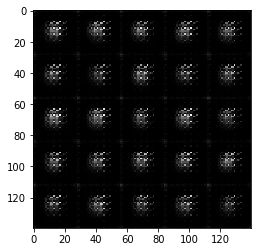

Epoch 1/2... Discriminator Loss: 0.4571... Generator Loss: 6.3640
Epoch 1/2... Discriminator Loss: 0.6930... Generator Loss: 3.0154
Epoch 1/2... Discriminator Loss: 0.4284... Generator Loss: 4.2184
Epoch 1/2... Discriminator Loss: 0.6335... Generator Loss: 3.7761
Epoch 1/2... Discriminator Loss: 0.7035... Generator Loss: 1.9749
Epoch 1/2... Discriminator Loss: 0.4623... Generator Loss: 3.5090
Epoch 1/2... Discriminator Loss: 0.6702... Generator Loss: 1.4880
Epoch 1/2... Discriminator Loss: 0.6468... Generator Loss: 1.6685
Epoch 1/2... Discriminator Loss: 0.4549... Generator Loss: 2.8604
Epoch 1/2... Discriminator Loss: 0.3699... Generator Loss: 4.4134


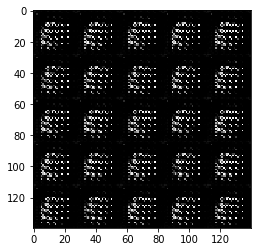

Epoch 1/2... Discriminator Loss: 0.4166... Generator Loss: 3.2613
Epoch 1/2... Discriminator Loss: 0.3915... Generator Loss: 3.8754
Epoch 1/2... Discriminator Loss: 0.4315... Generator Loss: 2.8123
Epoch 1/2... Discriminator Loss: 0.4502... Generator Loss: 2.7297
Epoch 1/2... Discriminator Loss: 0.4969... Generator Loss: 2.5757
Epoch 1/2... Discriminator Loss: 0.6812... Generator Loss: 1.6162
Epoch 1/2... Discriminator Loss: 0.6363... Generator Loss: 5.0328
Epoch 1/2... Discriminator Loss: 0.6478... Generator Loss: 4.3597
Epoch 1/2... Discriminator Loss: 2.8480... Generator Loss: 0.2023
Epoch 1/2... Discriminator Loss: 1.0531... Generator Loss: 1.5597


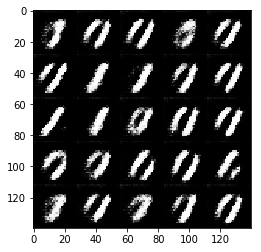

Epoch 1/2... Discriminator Loss: 0.6983... Generator Loss: 1.7452
Epoch 1/2... Discriminator Loss: 0.5277... Generator Loss: 2.4835
Epoch 1/2... Discriminator Loss: 0.5262... Generator Loss: 2.4159
Epoch 1/2... Discriminator Loss: 0.5510... Generator Loss: 2.1460
Epoch 1/2... Discriminator Loss: 0.6486... Generator Loss: 1.9153
Epoch 1/2... Discriminator Loss: 0.7353... Generator Loss: 1.4257
Epoch 1/2... Discriminator Loss: 0.6245... Generator Loss: 2.6660
Epoch 1/2... Discriminator Loss: 0.6034... Generator Loss: 2.1595
Epoch 1/2... Discriminator Loss: 0.8219... Generator Loss: 1.2059
Epoch 1/2... Discriminator Loss: 0.8284... Generator Loss: 1.4756


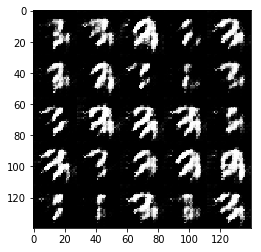

Epoch 1/2... Discriminator Loss: 1.0688... Generator Loss: 0.8930
Epoch 1/2... Discriminator Loss: 1.0153... Generator Loss: 1.3635
Epoch 1/2... Discriminator Loss: 0.5943... Generator Loss: 2.4822
Epoch 1/2... Discriminator Loss: 0.9227... Generator Loss: 1.4888
Epoch 1/2... Discriminator Loss: 0.7331... Generator Loss: 1.8895
Epoch 1/2... Discriminator Loss: 0.7533... Generator Loss: 1.6360
Epoch 1/2... Discriminator Loss: 0.6362... Generator Loss: 2.3474
Epoch 1/2... Discriminator Loss: 0.8028... Generator Loss: 1.8154
Epoch 1/2... Discriminator Loss: 0.7807... Generator Loss: 2.1137
Epoch 1/2... Discriminator Loss: 0.9539... Generator Loss: 2.0519


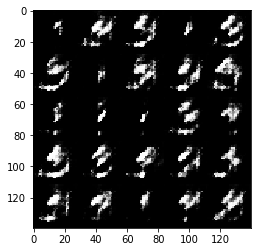

Epoch 1/2... Discriminator Loss: 0.8389... Generator Loss: 1.8202
Epoch 1/2... Discriminator Loss: 0.8554... Generator Loss: 1.2961
Epoch 1/2... Discriminator Loss: 0.9306... Generator Loss: 1.1706
Epoch 1/2... Discriminator Loss: 1.0600... Generator Loss: 1.0406
Epoch 1/2... Discriminator Loss: 0.9267... Generator Loss: 1.2639
Epoch 1/2... Discriminator Loss: 1.2799... Generator Loss: 0.8426
Epoch 1/2... Discriminator Loss: 1.1211... Generator Loss: 1.4891
Epoch 1/2... Discriminator Loss: 1.4945... Generator Loss: 0.7409
Epoch 1/2... Discriminator Loss: 1.0203... Generator Loss: 1.0494
Epoch 1/2... Discriminator Loss: 0.9362... Generator Loss: 1.0487


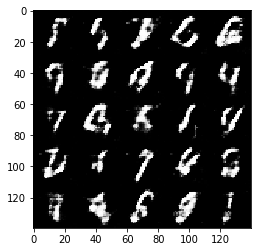

Epoch 1/2... Discriminator Loss: 1.1629... Generator Loss: 1.4892
Epoch 1/2... Discriminator Loss: 1.3216... Generator Loss: 1.2541
Epoch 1/2... Discriminator Loss: 1.0808... Generator Loss: 1.2132
Epoch 1/2... Discriminator Loss: 1.1578... Generator Loss: 0.9552
Epoch 1/2... Discriminator Loss: 1.1436... Generator Loss: 1.1007
Epoch 1/2... Discriminator Loss: 1.3944... Generator Loss: 0.5495
Epoch 1/2... Discriminator Loss: 1.0101... Generator Loss: 0.9899
Epoch 1/2... Discriminator Loss: 1.2811... Generator Loss: 0.7341
Epoch 1/2... Discriminator Loss: 1.2769... Generator Loss: 0.8691
Epoch 1/2... Discriminator Loss: 1.1973... Generator Loss: 0.8502


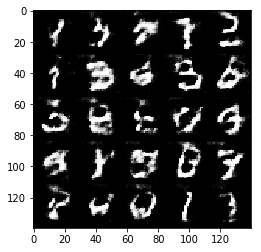

Epoch 1/2... Discriminator Loss: 1.3524... Generator Loss: 1.0560
Epoch 1/2... Discriminator Loss: 1.2425... Generator Loss: 0.8834
Epoch 1/2... Discriminator Loss: 1.1818... Generator Loss: 1.3408
Epoch 1/2... Discriminator Loss: 1.1612... Generator Loss: 1.0923
Epoch 1/2... Discriminator Loss: 1.2710... Generator Loss: 0.6343
Epoch 1/2... Discriminator Loss: 1.1580... Generator Loss: 1.0084
Epoch 1/2... Discriminator Loss: 1.2234... Generator Loss: 1.0308
Epoch 1/2... Discriminator Loss: 1.1780... Generator Loss: 1.2383
Epoch 1/2... Discriminator Loss: 1.2735... Generator Loss: 0.7257
Epoch 1/2... Discriminator Loss: 1.3163... Generator Loss: 0.8273


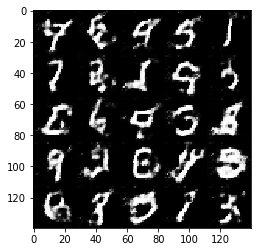

Epoch 1/2... Discriminator Loss: 1.3923... Generator Loss: 0.6178
Epoch 1/2... Discriminator Loss: 1.1480... Generator Loss: 0.8326
Epoch 1/2... Discriminator Loss: 1.3679... Generator Loss: 0.8036
Epoch 1/2... Discriminator Loss: 1.3005... Generator Loss: 0.7459
Epoch 1/2... Discriminator Loss: 1.0747... Generator Loss: 1.0125
Epoch 1/2... Discriminator Loss: 1.4117... Generator Loss: 0.6034
Epoch 1/2... Discriminator Loss: 1.2660... Generator Loss: 0.7707
Epoch 1/2... Discriminator Loss: 1.1177... Generator Loss: 1.1123
Epoch 1/2... Discriminator Loss: 1.1596... Generator Loss: 0.9102
Epoch 1/2... Discriminator Loss: 1.0971... Generator Loss: 0.9563


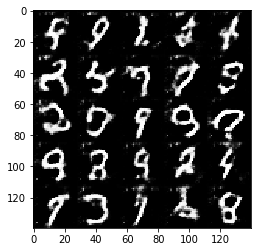

Epoch 1/2... Discriminator Loss: 1.0944... Generator Loss: 0.9772
Epoch 1/2... Discriminator Loss: 1.2053... Generator Loss: 0.8377
Epoch 1/2... Discriminator Loss: 1.2653... Generator Loss: 0.8607
Epoch 1/2... Discriminator Loss: 1.0843... Generator Loss: 1.6014
Epoch 1/2... Discriminator Loss: 1.2200... Generator Loss: 0.8379
Epoch 1/2... Discriminator Loss: 1.2184... Generator Loss: 0.7613
Epoch 1/2... Discriminator Loss: 1.1147... Generator Loss: 0.8730
Epoch 1/2... Discriminator Loss: 1.2767... Generator Loss: 1.1090
Epoch 1/2... Discriminator Loss: 1.1711... Generator Loss: 0.7572
Epoch 1/2... Discriminator Loss: 1.1896... Generator Loss: 0.7172


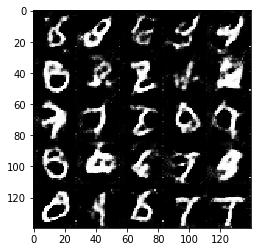

Epoch 1/2... Discriminator Loss: 1.0238... Generator Loss: 1.3325
Epoch 1/2... Discriminator Loss: 1.2511... Generator Loss: 0.8051
Epoch 1/2... Discriminator Loss: 1.1012... Generator Loss: 1.1505
Epoch 1/2... Discriminator Loss: 1.1936... Generator Loss: 0.8897
Epoch 1/2... Discriminator Loss: 1.1728... Generator Loss: 0.9655
Epoch 1/2... Discriminator Loss: 1.1860... Generator Loss: 0.9724
Epoch 1/2... Discriminator Loss: 1.2074... Generator Loss: 0.9570
Epoch 1/2... Discriminator Loss: 1.1836... Generator Loss: 0.9007
Epoch 1/2... Discriminator Loss: 1.4103... Generator Loss: 0.6033
Epoch 1/2... Discriminator Loss: 1.4479... Generator Loss: 0.5755


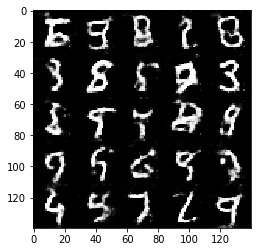

Epoch 1/2... Discriminator Loss: 1.1683... Generator Loss: 0.7759
Epoch 1/2... Discriminator Loss: 1.1878... Generator Loss: 0.9207
Epoch 1/2... Discriminator Loss: 1.2415... Generator Loss: 0.8650
Epoch 1/2... Discriminator Loss: 1.1702... Generator Loss: 1.0820
Epoch 1/2... Discriminator Loss: 0.9997... Generator Loss: 1.1372
Epoch 1/2... Discriminator Loss: 1.1784... Generator Loss: 0.9192
Epoch 1/2... Discriminator Loss: 1.0658... Generator Loss: 0.9558
Epoch 1/2... Discriminator Loss: 1.1025... Generator Loss: 1.3774
Epoch 1/2... Discriminator Loss: 1.1750... Generator Loss: 0.9529
Epoch 1/2... Discriminator Loss: 1.1976... Generator Loss: 0.8218


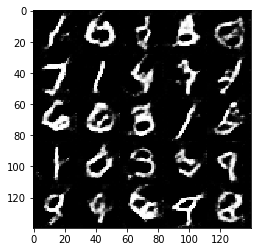

Epoch 1/2... Discriminator Loss: 1.1377... Generator Loss: 1.1007
Epoch 1/2... Discriminator Loss: 1.2442... Generator Loss: 0.7713
Epoch 1/2... Discriminator Loss: 1.2040... Generator Loss: 0.8152
Epoch 1/2... Discriminator Loss: 1.0076... Generator Loss: 1.0714
Epoch 1/2... Discriminator Loss: 1.3355... Generator Loss: 0.5800
Epoch 1/2... Discriminator Loss: 1.1864... Generator Loss: 0.8211
Epoch 1/2... Discriminator Loss: 1.1282... Generator Loss: 1.1245
Epoch 1/2... Discriminator Loss: 1.2560... Generator Loss: 1.5030
Epoch 1/2... Discriminator Loss: 1.2513... Generator Loss: 0.7521
Epoch 1/2... Discriminator Loss: 1.0903... Generator Loss: 1.2104


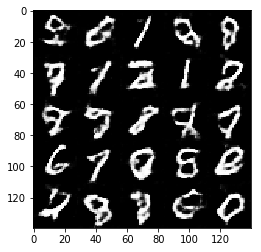

Epoch 1/2... Discriminator Loss: 1.2457... Generator Loss: 0.7271
Epoch 1/2... Discriminator Loss: 1.0946... Generator Loss: 0.9371
Epoch 1/2... Discriminator Loss: 1.3488... Generator Loss: 0.6845
Epoch 1/2... Discriminator Loss: 1.1631... Generator Loss: 0.9676
Epoch 1/2... Discriminator Loss: 1.2991... Generator Loss: 0.7519
Epoch 1/2... Discriminator Loss: 1.4272... Generator Loss: 0.5892
Epoch 1/2... Discriminator Loss: 1.2906... Generator Loss: 1.4849
Epoch 1/2... Discriminator Loss: 1.1321... Generator Loss: 1.1655
Epoch 1/2... Discriminator Loss: 1.1368... Generator Loss: 0.8959
Epoch 1/2... Discriminator Loss: 1.1966... Generator Loss: 1.2742


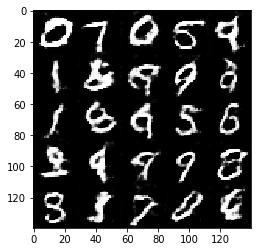

Epoch 1/2... Discriminator Loss: 1.1258... Generator Loss: 0.9006
Epoch 1/2... Discriminator Loss: 1.0228... Generator Loss: 1.3201
Epoch 1/2... Discriminator Loss: 1.0598... Generator Loss: 1.0623
Epoch 1/2... Discriminator Loss: 1.3021... Generator Loss: 0.7555
Epoch 1/2... Discriminator Loss: 1.1314... Generator Loss: 0.8073
Epoch 1/2... Discriminator Loss: 1.1289... Generator Loss: 1.1242
Epoch 1/2... Discriminator Loss: 1.1862... Generator Loss: 0.8711
Epoch 1/2... Discriminator Loss: 1.3104... Generator Loss: 0.6958
Epoch 1/2... Discriminator Loss: 1.2499... Generator Loss: 1.1203
Epoch 1/2... Discriminator Loss: 1.0772... Generator Loss: 1.2113


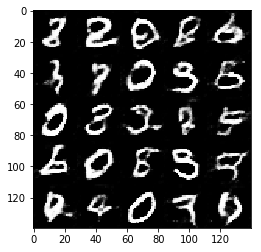

Epoch 1/2... Discriminator Loss: 1.1048... Generator Loss: 1.3340
Epoch 1/2... Discriminator Loss: 1.2342... Generator Loss: 0.8185
Epoch 1/2... Discriminator Loss: 1.1341... Generator Loss: 1.1016
Epoch 1/2... Discriminator Loss: 1.2275... Generator Loss: 0.9804
Epoch 1/2... Discriminator Loss: 1.0388... Generator Loss: 1.1365
Epoch 1/2... Discriminator Loss: 1.0559... Generator Loss: 1.0810
Epoch 1/2... Discriminator Loss: 1.1274... Generator Loss: 0.9508
Epoch 1/2... Discriminator Loss: 1.1421... Generator Loss: 1.1055
Epoch 1/2... Discriminator Loss: 1.2965... Generator Loss: 0.5902
Epoch 1/2... Discriminator Loss: 1.0805... Generator Loss: 1.2125


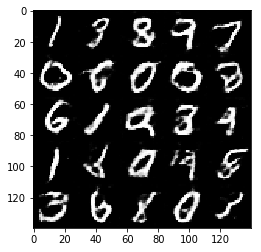

Epoch 1/2... Discriminator Loss: 1.0673... Generator Loss: 1.2527
Epoch 1/2... Discriminator Loss: 0.9928... Generator Loss: 1.2237
Epoch 1/2... Discriminator Loss: 1.3753... Generator Loss: 0.5342
Epoch 1/2... Discriminator Loss: 1.1224... Generator Loss: 1.1675
Epoch 1/2... Discriminator Loss: 1.0851... Generator Loss: 0.9317
Epoch 1/2... Discriminator Loss: 0.9803... Generator Loss: 1.5352
Epoch 1/2... Discriminator Loss: 1.1992... Generator Loss: 0.7400
Epoch 1/2... Discriminator Loss: 1.1792... Generator Loss: 0.8575
Epoch 1/2... Discriminator Loss: 1.1449... Generator Loss: 0.8024
Epoch 1/2... Discriminator Loss: 1.1488... Generator Loss: 0.7216


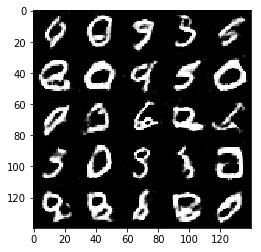

Epoch 1/2... Discriminator Loss: 0.9814... Generator Loss: 1.3232
Epoch 1/2... Discriminator Loss: 1.0998... Generator Loss: 1.0822
Epoch 1/2... Discriminator Loss: 1.0073... Generator Loss: 1.0435
Epoch 1/2... Discriminator Loss: 0.9867... Generator Loss: 0.9489
Epoch 1/2... Discriminator Loss: 1.1730... Generator Loss: 0.9137
Epoch 1/2... Discriminator Loss: 1.3065... Generator Loss: 0.5857
Epoch 1/2... Discriminator Loss: 1.0356... Generator Loss: 1.3375
Epoch 1/2... Discriminator Loss: 1.3666... Generator Loss: 0.5545
Epoch 1/2... Discriminator Loss: 1.2555... Generator Loss: 1.5794
Epoch 1/2... Discriminator Loss: 1.1107... Generator Loss: 1.1826


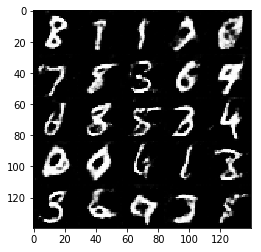

Epoch 1/2... Discriminator Loss: 1.3039... Generator Loss: 0.6174
Epoch 1/2... Discriminator Loss: 1.3596... Generator Loss: 0.5360
Epoch 1/2... Discriminator Loss: 1.1029... Generator Loss: 1.3462
Epoch 1/2... Discriminator Loss: 1.4442... Generator Loss: 0.5688
Epoch 1/2... Discriminator Loss: 1.0859... Generator Loss: 1.3234
Epoch 1/2... Discriminator Loss: 1.3425... Generator Loss: 0.5325
Epoch 1/2... Discriminator Loss: 1.2759... Generator Loss: 0.7466
Epoch 2/2... Discriminator Loss: 1.0127... Generator Loss: 1.4931
Epoch 2/2... Discriminator Loss: 1.5127... Generator Loss: 2.0708
Epoch 2/2... Discriminator Loss: 1.1627... Generator Loss: 0.9496


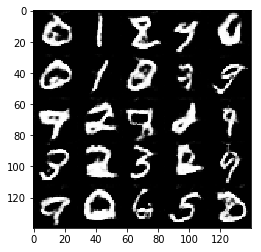

Epoch 2/2... Discriminator Loss: 1.2349... Generator Loss: 0.6934
Epoch 2/2... Discriminator Loss: 0.9070... Generator Loss: 1.4011
Epoch 2/2... Discriminator Loss: 1.1109... Generator Loss: 1.4585
Epoch 2/2... Discriminator Loss: 0.9300... Generator Loss: 1.0583
Epoch 2/2... Discriminator Loss: 1.1029... Generator Loss: 1.6039
Epoch 2/2... Discriminator Loss: 1.0749... Generator Loss: 0.8399
Epoch 2/2... Discriminator Loss: 1.1181... Generator Loss: 1.1307
Epoch 2/2... Discriminator Loss: 1.0654... Generator Loss: 0.8992
Epoch 2/2... Discriminator Loss: 1.2974... Generator Loss: 0.6177
Epoch 2/2... Discriminator Loss: 1.3484... Generator Loss: 0.5623


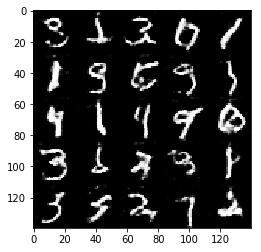

Epoch 2/2... Discriminator Loss: 1.3871... Generator Loss: 1.3354
Epoch 2/2... Discriminator Loss: 1.0326... Generator Loss: 1.1530
Epoch 2/2... Discriminator Loss: 1.0525... Generator Loss: 1.3586
Epoch 2/2... Discriminator Loss: 0.9385... Generator Loss: 1.5123
Epoch 2/2... Discriminator Loss: 1.4715... Generator Loss: 0.4812
Epoch 2/2... Discriminator Loss: 1.1660... Generator Loss: 0.7836
Epoch 2/2... Discriminator Loss: 1.2341... Generator Loss: 0.6637
Epoch 2/2... Discriminator Loss: 1.0425... Generator Loss: 0.9354
Epoch 2/2... Discriminator Loss: 1.5891... Generator Loss: 0.3807
Epoch 2/2... Discriminator Loss: 1.1936... Generator Loss: 0.6536


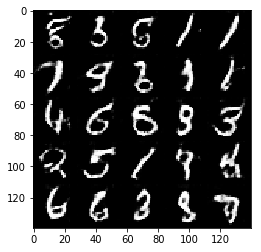

Epoch 2/2... Discriminator Loss: 0.9821... Generator Loss: 1.1012
Epoch 2/2... Discriminator Loss: 1.2073... Generator Loss: 0.7568
Epoch 2/2... Discriminator Loss: 1.0982... Generator Loss: 0.9560
Epoch 2/2... Discriminator Loss: 1.2186... Generator Loss: 0.7549
Epoch 2/2... Discriminator Loss: 0.9677... Generator Loss: 1.0242
Epoch 2/2... Discriminator Loss: 1.4248... Generator Loss: 0.5194
Epoch 2/2... Discriminator Loss: 1.2807... Generator Loss: 0.6677
Epoch 2/2... Discriminator Loss: 1.1799... Generator Loss: 0.6848
Epoch 2/2... Discriminator Loss: 1.0249... Generator Loss: 1.3826
Epoch 2/2... Discriminator Loss: 1.2624... Generator Loss: 0.6782


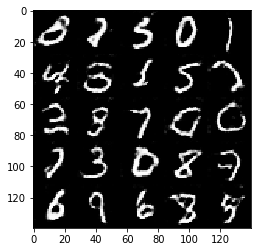

Epoch 2/2... Discriminator Loss: 1.2433... Generator Loss: 1.7577
Epoch 2/2... Discriminator Loss: 1.0943... Generator Loss: 0.7762
Epoch 2/2... Discriminator Loss: 1.0240... Generator Loss: 0.9666
Epoch 2/2... Discriminator Loss: 1.2796... Generator Loss: 0.5860
Epoch 2/2... Discriminator Loss: 1.3550... Generator Loss: 1.5604
Epoch 2/2... Discriminator Loss: 1.0864... Generator Loss: 0.8053
Epoch 2/2... Discriminator Loss: 1.0542... Generator Loss: 1.0111
Epoch 2/2... Discriminator Loss: 1.1903... Generator Loss: 1.7551
Epoch 2/2... Discriminator Loss: 1.2226... Generator Loss: 0.8187
Epoch 2/2... Discriminator Loss: 0.9729... Generator Loss: 1.1076


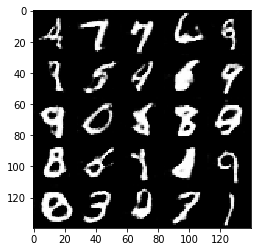

Epoch 2/2... Discriminator Loss: 1.1789... Generator Loss: 0.6880
Epoch 2/2... Discriminator Loss: 0.9007... Generator Loss: 1.1399
Epoch 2/2... Discriminator Loss: 1.1423... Generator Loss: 0.8712
Epoch 2/2... Discriminator Loss: 1.0678... Generator Loss: 0.7777
Epoch 2/2... Discriminator Loss: 1.2032... Generator Loss: 0.7481
Epoch 2/2... Discriminator Loss: 0.9623... Generator Loss: 1.1790
Epoch 2/2... Discriminator Loss: 0.8886... Generator Loss: 1.3037
Epoch 2/2... Discriminator Loss: 1.1579... Generator Loss: 1.8802
Epoch 2/2... Discriminator Loss: 1.0931... Generator Loss: 0.8319
Epoch 2/2... Discriminator Loss: 1.3166... Generator Loss: 0.5789


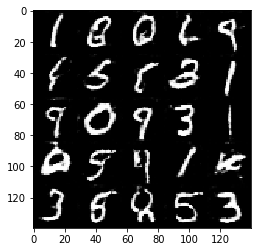

Epoch 2/2... Discriminator Loss: 0.9917... Generator Loss: 1.3508
Epoch 2/2... Discriminator Loss: 0.9784... Generator Loss: 1.2494
Epoch 2/2... Discriminator Loss: 1.4563... Generator Loss: 0.4688
Epoch 2/2... Discriminator Loss: 1.0758... Generator Loss: 0.9016
Epoch 2/2... Discriminator Loss: 0.9543... Generator Loss: 1.1029
Epoch 2/2... Discriminator Loss: 1.3095... Generator Loss: 0.5583
Epoch 2/2... Discriminator Loss: 0.9499... Generator Loss: 1.2006
Epoch 2/2... Discriminator Loss: 1.1149... Generator Loss: 0.9524
Epoch 2/2... Discriminator Loss: 1.7029... Generator Loss: 0.3369
Epoch 2/2... Discriminator Loss: 1.2332... Generator Loss: 0.6362


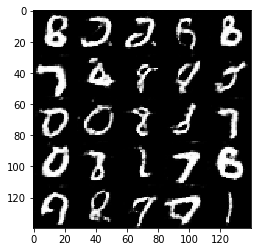

Epoch 2/2... Discriminator Loss: 1.4247... Generator Loss: 0.5700
Epoch 2/2... Discriminator Loss: 0.9003... Generator Loss: 1.4351
Epoch 2/2... Discriminator Loss: 1.6471... Generator Loss: 0.4089
Epoch 2/2... Discriminator Loss: 0.9072... Generator Loss: 1.0306
Epoch 2/2... Discriminator Loss: 1.0560... Generator Loss: 1.0867
Epoch 2/2... Discriminator Loss: 1.4187... Generator Loss: 0.5029
Epoch 2/2... Discriminator Loss: 0.8867... Generator Loss: 1.5400
Epoch 2/2... Discriminator Loss: 1.6444... Generator Loss: 0.4316
Epoch 2/2... Discriminator Loss: 1.0469... Generator Loss: 0.8201
Epoch 2/2... Discriminator Loss: 1.0670... Generator Loss: 1.0728


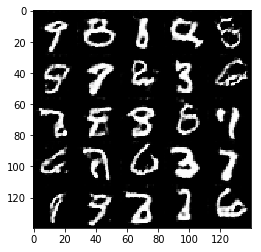

Epoch 2/2... Discriminator Loss: 1.1313... Generator Loss: 0.7749
Epoch 2/2... Discriminator Loss: 0.9936... Generator Loss: 1.0340
Epoch 2/2... Discriminator Loss: 1.1068... Generator Loss: 0.7694
Epoch 2/2... Discriminator Loss: 2.3765... Generator Loss: 3.9910
Epoch 2/2... Discriminator Loss: 1.2468... Generator Loss: 1.1566
Epoch 2/2... Discriminator Loss: 1.4128... Generator Loss: 0.5393
Epoch 2/2... Discriminator Loss: 1.7576... Generator Loss: 0.3788
Epoch 2/2... Discriminator Loss: 1.0061... Generator Loss: 1.0351
Epoch 2/2... Discriminator Loss: 0.9843... Generator Loss: 0.9759
Epoch 2/2... Discriminator Loss: 0.9798... Generator Loss: 1.3378


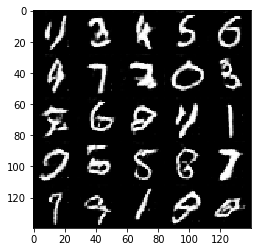

Epoch 2/2... Discriminator Loss: 1.1586... Generator Loss: 0.8575
Epoch 2/2... Discriminator Loss: 1.0082... Generator Loss: 1.0034
Epoch 2/2... Discriminator Loss: 1.0118... Generator Loss: 1.1975
Epoch 2/2... Discriminator Loss: 1.1131... Generator Loss: 1.0922
Epoch 2/2... Discriminator Loss: 0.9653... Generator Loss: 0.9930
Epoch 2/2... Discriminator Loss: 0.9705... Generator Loss: 1.2883
Epoch 2/2... Discriminator Loss: 1.1082... Generator Loss: 0.8373
Epoch 2/2... Discriminator Loss: 0.9604... Generator Loss: 1.1099
Epoch 2/2... Discriminator Loss: 1.0540... Generator Loss: 0.8295
Epoch 2/2... Discriminator Loss: 1.2677... Generator Loss: 1.5689


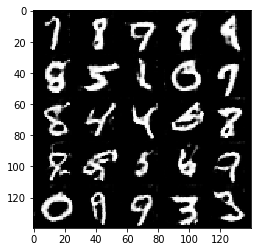

Epoch 2/2... Discriminator Loss: 1.0036... Generator Loss: 1.3076
Epoch 2/2... Discriminator Loss: 0.9849... Generator Loss: 1.0431
Epoch 2/2... Discriminator Loss: 1.2884... Generator Loss: 0.5803
Epoch 2/2... Discriminator Loss: 1.1024... Generator Loss: 0.8138
Epoch 2/2... Discriminator Loss: 0.9020... Generator Loss: 1.2920
Epoch 2/2... Discriminator Loss: 1.1091... Generator Loss: 0.8475
Epoch 2/2... Discriminator Loss: 1.0873... Generator Loss: 1.2687
Epoch 2/2... Discriminator Loss: 1.1108... Generator Loss: 0.7141
Epoch 2/2... Discriminator Loss: 1.1690... Generator Loss: 1.6231
Epoch 2/2... Discriminator Loss: 1.2018... Generator Loss: 0.7013


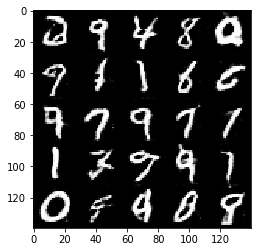

Epoch 2/2... Discriminator Loss: 1.0275... Generator Loss: 1.0502
Epoch 2/2... Discriminator Loss: 0.8829... Generator Loss: 1.5322
Epoch 2/2... Discriminator Loss: 0.9863... Generator Loss: 0.9073
Epoch 2/2... Discriminator Loss: 1.2913... Generator Loss: 0.6144
Epoch 2/2... Discriminator Loss: 1.1878... Generator Loss: 0.7450
Epoch 2/2... Discriminator Loss: 1.0615... Generator Loss: 0.8619
Epoch 2/2... Discriminator Loss: 1.1527... Generator Loss: 0.9269
Epoch 2/2... Discriminator Loss: 1.5114... Generator Loss: 0.4464
Epoch 2/2... Discriminator Loss: 1.2160... Generator Loss: 0.6897
Epoch 2/2... Discriminator Loss: 1.0143... Generator Loss: 0.9829


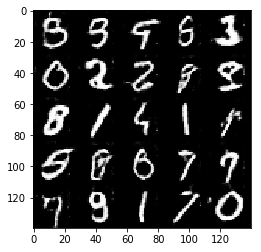

Epoch 2/2... Discriminator Loss: 0.8923... Generator Loss: 1.1753
Epoch 2/2... Discriminator Loss: 0.9557... Generator Loss: 1.5925
Epoch 2/2... Discriminator Loss: 1.1734... Generator Loss: 0.7038
Epoch 2/2... Discriminator Loss: 1.3159... Generator Loss: 0.6149
Epoch 2/2... Discriminator Loss: 1.2386... Generator Loss: 0.7965
Epoch 2/2... Discriminator Loss: 0.8929... Generator Loss: 1.5094
Epoch 2/2... Discriminator Loss: 1.2023... Generator Loss: 0.6389
Epoch 2/2... Discriminator Loss: 0.9733... Generator Loss: 0.9911
Epoch 2/2... Discriminator Loss: 1.4670... Generator Loss: 0.5201
Epoch 2/2... Discriminator Loss: 1.1158... Generator Loss: 1.2561


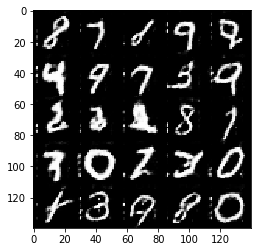

Epoch 2/2... Discriminator Loss: 1.0502... Generator Loss: 1.5255
Epoch 2/2... Discriminator Loss: 1.3720... Generator Loss: 0.5270
Epoch 2/2... Discriminator Loss: 0.8761... Generator Loss: 1.4013
Epoch 2/2... Discriminator Loss: 0.9293... Generator Loss: 1.0189
Epoch 2/2... Discriminator Loss: 1.6283... Generator Loss: 0.4062
Epoch 2/2... Discriminator Loss: 0.9825... Generator Loss: 0.9654
Epoch 2/2... Discriminator Loss: 1.0663... Generator Loss: 0.9253
Epoch 2/2... Discriminator Loss: 0.8348... Generator Loss: 1.2474
Epoch 2/2... Discriminator Loss: 1.2176... Generator Loss: 0.9549
Epoch 2/2... Discriminator Loss: 1.1195... Generator Loss: 0.8622


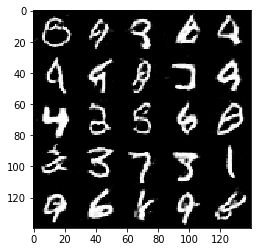

Epoch 2/2... Discriminator Loss: 1.1041... Generator Loss: 0.8109
Epoch 2/2... Discriminator Loss: 0.9511... Generator Loss: 1.1193
Epoch 2/2... Discriminator Loss: 1.0554... Generator Loss: 1.2477
Epoch 2/2... Discriminator Loss: 1.0664... Generator Loss: 1.2531
Epoch 2/2... Discriminator Loss: 0.8876... Generator Loss: 0.9996
Epoch 2/2... Discriminator Loss: 1.1351... Generator Loss: 1.3369
Epoch 2/2... Discriminator Loss: 0.8963... Generator Loss: 1.2462
Epoch 2/2... Discriminator Loss: 1.0097... Generator Loss: 1.0714
Epoch 2/2... Discriminator Loss: 0.9413... Generator Loss: 1.0736
Epoch 2/2... Discriminator Loss: 1.1523... Generator Loss: 0.7125


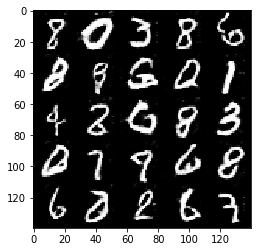

Epoch 2/2... Discriminator Loss: 1.6786... Generator Loss: 0.3599
Epoch 2/2... Discriminator Loss: 0.8972... Generator Loss: 1.2840
Epoch 2/2... Discriminator Loss: 1.0007... Generator Loss: 0.9000
Epoch 2/2... Discriminator Loss: 1.0182... Generator Loss: 0.9513
Epoch 2/2... Discriminator Loss: 0.8727... Generator Loss: 1.3049
Epoch 2/2... Discriminator Loss: 0.9497... Generator Loss: 1.7695
Epoch 2/2... Discriminator Loss: 0.8970... Generator Loss: 1.1393
Epoch 2/2... Discriminator Loss: 1.3729... Generator Loss: 2.2865
Epoch 2/2... Discriminator Loss: 0.9814... Generator Loss: 1.3335
Epoch 2/2... Discriminator Loss: 0.8806... Generator Loss: 1.2244


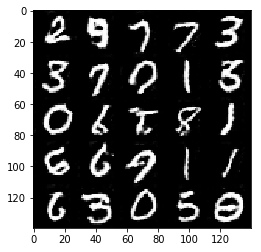

Epoch 2/2... Discriminator Loss: 1.4930... Generator Loss: 0.4772
Epoch 2/2... Discriminator Loss: 0.9721... Generator Loss: 1.0381
Epoch 2/2... Discriminator Loss: 0.9841... Generator Loss: 1.0512
Epoch 2/2... Discriminator Loss: 0.9166... Generator Loss: 1.0055
Epoch 2/2... Discriminator Loss: 1.0907... Generator Loss: 0.8268
Epoch 2/2... Discriminator Loss: 1.0804... Generator Loss: 1.5396
Epoch 2/2... Discriminator Loss: 1.1426... Generator Loss: 1.2005
Epoch 2/2... Discriminator Loss: 0.8559... Generator Loss: 1.3611
Epoch 2/2... Discriminator Loss: 0.9297... Generator Loss: 1.2526
Epoch 2/2... Discriminator Loss: 1.5097... Generator Loss: 0.4982


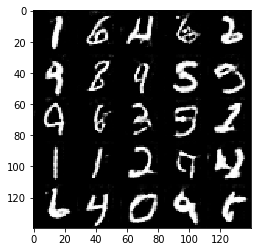

Epoch 2/2... Discriminator Loss: 1.1191... Generator Loss: 1.0644
Epoch 2/2... Discriminator Loss: 0.8685... Generator Loss: 1.3774
Epoch 2/2... Discriminator Loss: 1.2771... Generator Loss: 0.5867
Epoch 2/2... Discriminator Loss: 0.9534... Generator Loss: 1.0050
Epoch 2/2... Discriminator Loss: 0.9109... Generator Loss: 1.2957
Epoch 2/2... Discriminator Loss: 1.1031... Generator Loss: 0.7051
Epoch 2/2... Discriminator Loss: 0.9988... Generator Loss: 0.9399
Epoch 2/2... Discriminator Loss: 0.8325... Generator Loss: 1.6829
Epoch 2/2... Discriminator Loss: 1.2307... Generator Loss: 0.7016
Epoch 2/2... Discriminator Loss: 0.8131... Generator Loss: 1.8260


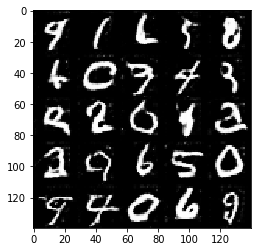

Epoch 2/2... Discriminator Loss: 1.0345... Generator Loss: 0.9712
Epoch 2/2... Discriminator Loss: 0.9529... Generator Loss: 1.2533
Epoch 2/2... Discriminator Loss: 1.1141... Generator Loss: 0.8423
Epoch 2/2... Discriminator Loss: 1.4578... Generator Loss: 0.4801
Epoch 2/2... Discriminator Loss: 1.2033... Generator Loss: 0.7483
Epoch 2/2... Discriminator Loss: 0.8972... Generator Loss: 1.0788
Epoch 2/2... Discriminator Loss: 0.8945... Generator Loss: 1.0986
Epoch 2/2... Discriminator Loss: 1.0616... Generator Loss: 0.8893
Epoch 2/2... Discriminator Loss: 1.1361... Generator Loss: 1.9315
Epoch 2/2... Discriminator Loss: 1.0405... Generator Loss: 1.2710


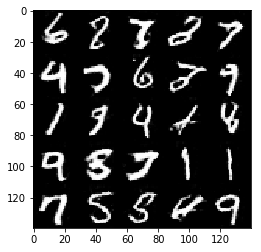

Epoch 2/2... Discriminator Loss: 1.0534... Generator Loss: 0.8742
Epoch 2/2... Discriminator Loss: 1.2856... Generator Loss: 0.5823
Epoch 2/2... Discriminator Loss: 1.0336... Generator Loss: 0.8346
Epoch 2/2... Discriminator Loss: 1.2472... Generator Loss: 0.6249
Epoch 2/2... Discriminator Loss: 1.0606... Generator Loss: 0.7996


In [12]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.9591... Generator Loss: 0.2612
Epoch 1/1... Discriminator Loss: 0.4415... Generator Loss: 3.4841
Epoch 1/1... Discriminator Loss: 0.3594... Generator Loss: 4.2005
Epoch 1/1... Discriminator Loss: 0.9371... Generator Loss: 11.3165
Epoch 1/1... Discriminator Loss: 0.2908... Generator Loss: 1.6808
Epoch 1/1... Discriminator Loss: 0.7745... Generator Loss: 0.8060
Epoch 1/1... Discriminator Loss: 0.3929... Generator Loss: 1.9108
Epoch 1/1... Discriminator Loss: 0.7127... Generator Loss: 0.8858
Epoch 1/1... Discriminator Loss: 2.4596... Generator Loss: 0.1194
Epoch 1/1... Discriminator Loss: 0.4562... Generator Loss: 4.5562


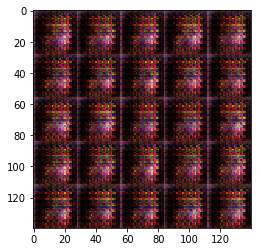

Epoch 1/1... Discriminator Loss: 1.0920... Generator Loss: 0.4466
Epoch 1/1... Discriminator Loss: 0.1036... Generator Loss: 3.2619
Epoch 1/1... Discriminator Loss: 0.3648... Generator Loss: 1.6440
Epoch 1/1... Discriminator Loss: 0.3478... Generator Loss: 1.8111
Epoch 1/1... Discriminator Loss: 0.1978... Generator Loss: 3.8042
Epoch 1/1... Discriminator Loss: 0.3748... Generator Loss: 1.5575
Epoch 1/1... Discriminator Loss: 0.0701... Generator Loss: 6.6921
Epoch 1/1... Discriminator Loss: 0.2997... Generator Loss: 2.3741
Epoch 1/1... Discriminator Loss: 0.2050... Generator Loss: 2.6575
Epoch 1/1... Discriminator Loss: 0.2274... Generator Loss: 2.2174


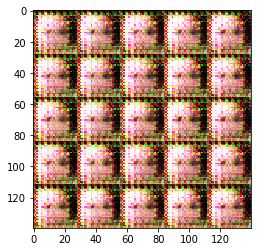

Epoch 1/1... Discriminator Loss: 0.1564... Generator Loss: 2.6849
Epoch 1/1... Discriminator Loss: 0.0936... Generator Loss: 2.9518
Epoch 1/1... Discriminator Loss: 0.1228... Generator Loss: 3.1406
Epoch 1/1... Discriminator Loss: 0.1707... Generator Loss: 5.7845
Epoch 1/1... Discriminator Loss: 0.3196... Generator Loss: 5.1679
Epoch 1/1... Discriminator Loss: 0.3031... Generator Loss: 1.9335
Epoch 1/1... Discriminator Loss: 0.1256... Generator Loss: 3.0185
Epoch 1/1... Discriminator Loss: 0.1232... Generator Loss: 3.2548
Epoch 1/1... Discriminator Loss: 0.1538... Generator Loss: 2.4978
Epoch 1/1... Discriminator Loss: 0.0973... Generator Loss: 3.3814


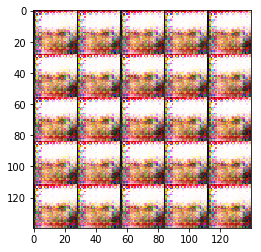

Epoch 1/1... Discriminator Loss: 0.1765... Generator Loss: 2.3711
Epoch 1/1... Discriminator Loss: 0.0765... Generator Loss: 3.2184
Epoch 1/1... Discriminator Loss: 0.1074... Generator Loss: 2.9528
Epoch 1/1... Discriminator Loss: 0.0870... Generator Loss: 2.8383
Epoch 1/1... Discriminator Loss: 0.1154... Generator Loss: 2.7925
Epoch 1/1... Discriminator Loss: 0.0935... Generator Loss: 3.4582
Epoch 1/1... Discriminator Loss: 0.2521... Generator Loss: 2.1602
Epoch 1/1... Discriminator Loss: 0.0523... Generator Loss: 3.7609
Epoch 1/1... Discriminator Loss: 0.0751... Generator Loss: 2.9966
Epoch 1/1... Discriminator Loss: 0.6214... Generator Loss: 1.2895


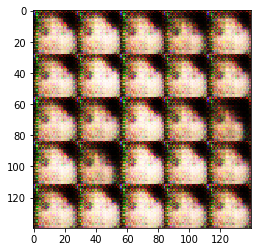

Epoch 1/1... Discriminator Loss: 0.7630... Generator Loss: 1.8399
Epoch 1/1... Discriminator Loss: 1.1600... Generator Loss: 0.8284
Epoch 1/1... Discriminator Loss: 0.9113... Generator Loss: 1.1924
Epoch 1/1... Discriminator Loss: 0.4471... Generator Loss: 1.6149
Epoch 1/1... Discriminator Loss: 0.5031... Generator Loss: 2.1114
Epoch 1/1... Discriminator Loss: 0.7467... Generator Loss: 0.8754
Epoch 1/1... Discriminator Loss: 0.7018... Generator Loss: 1.2647
Epoch 1/1... Discriminator Loss: 0.4975... Generator Loss: 1.5376
Epoch 1/1... Discriminator Loss: 1.0450... Generator Loss: 3.9571
Epoch 1/1... Discriminator Loss: 0.5257... Generator Loss: 1.3651


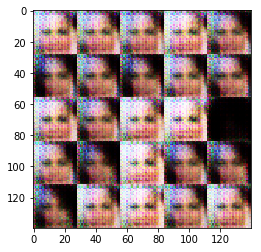

Epoch 1/1... Discriminator Loss: 1.3822... Generator Loss: 0.3329
Epoch 1/1... Discriminator Loss: 0.7765... Generator Loss: 4.3341
Epoch 1/1... Discriminator Loss: 0.9263... Generator Loss: 5.8546
Epoch 1/1... Discriminator Loss: 0.4618... Generator Loss: 1.9796
Epoch 1/1... Discriminator Loss: 0.5456... Generator Loss: 1.2908
Epoch 1/1... Discriminator Loss: 0.7145... Generator Loss: 1.2419
Epoch 1/1... Discriminator Loss: 0.6978... Generator Loss: 0.9272
Epoch 1/1... Discriminator Loss: 0.8985... Generator Loss: 0.7160
Epoch 1/1... Discriminator Loss: 0.8748... Generator Loss: 0.7163
Epoch 1/1... Discriminator Loss: 0.6436... Generator Loss: 1.4346


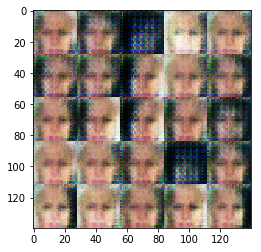

Epoch 1/1... Discriminator Loss: 0.9909... Generator Loss: 1.2639
Epoch 1/1... Discriminator Loss: 2.2846... Generator Loss: 6.1395
Epoch 1/1... Discriminator Loss: 0.9318... Generator Loss: 0.8793
Epoch 1/1... Discriminator Loss: 1.3025... Generator Loss: 2.1068
Epoch 1/1... Discriminator Loss: 0.7873... Generator Loss: 1.0589
Epoch 1/1... Discriminator Loss: 0.9298... Generator Loss: 1.0869
Epoch 1/1... Discriminator Loss: 1.0555... Generator Loss: 0.7674
Epoch 1/1... Discriminator Loss: 0.5817... Generator Loss: 1.7466
Epoch 1/1... Discriminator Loss: 0.7217... Generator Loss: 1.1029
Epoch 1/1... Discriminator Loss: 0.9445... Generator Loss: 1.3857


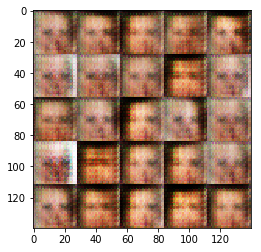

Epoch 1/1... Discriminator Loss: 1.1794... Generator Loss: 1.4628
Epoch 1/1... Discriminator Loss: 0.4831... Generator Loss: 1.5811
Epoch 1/1... Discriminator Loss: 0.4763... Generator Loss: 1.8105
Epoch 1/1... Discriminator Loss: 0.5778... Generator Loss: 1.4438
Epoch 1/1... Discriminator Loss: 0.5783... Generator Loss: 1.7954
Epoch 1/1... Discriminator Loss: 0.7180... Generator Loss: 1.2308
Epoch 1/1... Discriminator Loss: 0.6387... Generator Loss: 1.2216
Epoch 1/1... Discriminator Loss: 0.4394... Generator Loss: 1.5659
Epoch 1/1... Discriminator Loss: 0.4955... Generator Loss: 1.6485
Epoch 1/1... Discriminator Loss: 0.7919... Generator Loss: 1.1128


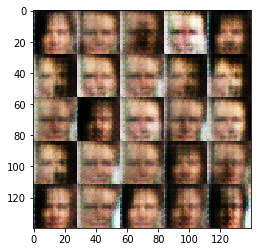

Epoch 1/1... Discriminator Loss: 1.3122... Generator Loss: 0.6710
Epoch 1/1... Discriminator Loss: 0.6771... Generator Loss: 1.1944
Epoch 1/1... Discriminator Loss: 0.3966... Generator Loss: 1.6483
Epoch 1/1... Discriminator Loss: 0.6192... Generator Loss: 2.1824
Epoch 1/1... Discriminator Loss: 0.7831... Generator Loss: 1.1404
Epoch 1/1... Discriminator Loss: 0.6745... Generator Loss: 1.4028
Epoch 1/1... Discriminator Loss: 0.7687... Generator Loss: 1.6311
Epoch 1/1... Discriminator Loss: 0.6593... Generator Loss: 1.7461
Epoch 1/1... Discriminator Loss: 0.6469... Generator Loss: 1.5418
Epoch 1/1... Discriminator Loss: 0.8428... Generator Loss: 1.8873


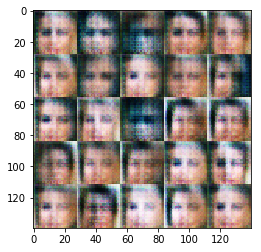

Epoch 1/1... Discriminator Loss: 0.7960... Generator Loss: 2.5148
Epoch 1/1... Discriminator Loss: 0.7475... Generator Loss: 1.4829
Epoch 1/1... Discriminator Loss: 1.0454... Generator Loss: 0.9095
Epoch 1/1... Discriminator Loss: 0.6556... Generator Loss: 1.0562
Epoch 1/1... Discriminator Loss: 0.5578... Generator Loss: 1.9264
Epoch 1/1... Discriminator Loss: 0.7748... Generator Loss: 2.1648
Epoch 1/1... Discriminator Loss: 0.6175... Generator Loss: 1.8843
Epoch 1/1... Discriminator Loss: 1.7973... Generator Loss: 0.2702
Epoch 1/1... Discriminator Loss: 0.6118... Generator Loss: 1.7519
Epoch 1/1... Discriminator Loss: 0.6129... Generator Loss: 1.1969


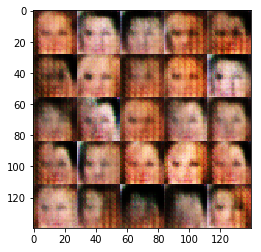

Epoch 1/1... Discriminator Loss: 0.7151... Generator Loss: 2.0465
Epoch 1/1... Discriminator Loss: 0.7976... Generator Loss: 1.4108
Epoch 1/1... Discriminator Loss: 2.0268... Generator Loss: 0.2649
Epoch 1/1... Discriminator Loss: 0.9410... Generator Loss: 1.1662
Epoch 1/1... Discriminator Loss: 0.9034... Generator Loss: 0.8854
Epoch 1/1... Discriminator Loss: 0.6350... Generator Loss: 2.8756
Epoch 1/1... Discriminator Loss: 1.1220... Generator Loss: 3.1080
Epoch 1/1... Discriminator Loss: 1.3651... Generator Loss: 3.5764
Epoch 1/1... Discriminator Loss: 0.9456... Generator Loss: 4.2353
Epoch 1/1... Discriminator Loss: 1.4962... Generator Loss: 3.5377


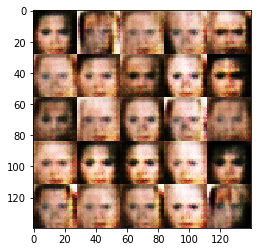

Epoch 1/1... Discriminator Loss: 0.8442... Generator Loss: 1.2081
Epoch 1/1... Discriminator Loss: 0.4769... Generator Loss: 1.8686
Epoch 1/1... Discriminator Loss: 1.1442... Generator Loss: 0.6401
Epoch 1/1... Discriminator Loss: 0.6617... Generator Loss: 1.3825
Epoch 1/1... Discriminator Loss: 0.7671... Generator Loss: 1.6849
Epoch 1/1... Discriminator Loss: 1.6093... Generator Loss: 3.5395
Epoch 1/1... Discriminator Loss: 0.7280... Generator Loss: 2.2167
Epoch 1/1... Discriminator Loss: 0.9759... Generator Loss: 2.3207
Epoch 1/1... Discriminator Loss: 0.8102... Generator Loss: 1.7383
Epoch 1/1... Discriminator Loss: 1.3041... Generator Loss: 0.5652


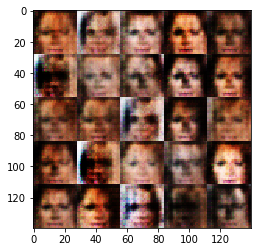

Epoch 1/1... Discriminator Loss: 0.7076... Generator Loss: 1.1254
Epoch 1/1... Discriminator Loss: 0.9672... Generator Loss: 0.9136
Epoch 1/1... Discriminator Loss: 0.7318... Generator Loss: 1.4538
Epoch 1/1... Discriminator Loss: 0.8328... Generator Loss: 1.3898
Epoch 1/1... Discriminator Loss: 0.8259... Generator Loss: 1.8593
Epoch 1/1... Discriminator Loss: 1.2007... Generator Loss: 0.7376
Epoch 1/1... Discriminator Loss: 0.7803... Generator Loss: 1.7914
Epoch 1/1... Discriminator Loss: 1.2568... Generator Loss: 0.5229
Epoch 1/1... Discriminator Loss: 1.0143... Generator Loss: 0.7628
Epoch 1/1... Discriminator Loss: 0.7411... Generator Loss: 1.2441


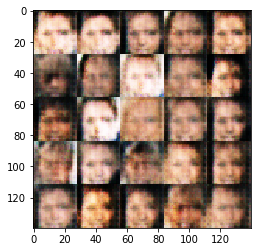

Epoch 1/1... Discriminator Loss: 0.8335... Generator Loss: 1.1861
Epoch 1/1... Discriminator Loss: 0.6018... Generator Loss: 1.3814
Epoch 1/1... Discriminator Loss: 0.7083... Generator Loss: 1.3916
Epoch 1/1... Discriminator Loss: 1.0546... Generator Loss: 0.7969
Epoch 1/1... Discriminator Loss: 0.9520... Generator Loss: 1.0819
Epoch 1/1... Discriminator Loss: 0.6338... Generator Loss: 1.9447
Epoch 1/1... Discriminator Loss: 0.7524... Generator Loss: 1.1465
Epoch 1/1... Discriminator Loss: 0.6110... Generator Loss: 1.2636
Epoch 1/1... Discriminator Loss: 0.6573... Generator Loss: 0.9707
Epoch 1/1... Discriminator Loss: 0.6464... Generator Loss: 1.3195


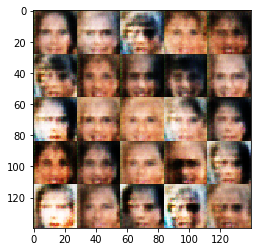

Epoch 1/1... Discriminator Loss: 0.7436... Generator Loss: 1.4724
Epoch 1/1... Discriminator Loss: 1.0287... Generator Loss: 0.6532
Epoch 1/1... Discriminator Loss: 0.9258... Generator Loss: 1.4370
Epoch 1/1... Discriminator Loss: 1.6383... Generator Loss: 0.3175
Epoch 1/1... Discriminator Loss: 1.1303... Generator Loss: 0.7414
Epoch 1/1... Discriminator Loss: 0.7606... Generator Loss: 1.1059
Epoch 1/1... Discriminator Loss: 1.1529... Generator Loss: 0.8374
Epoch 1/1... Discriminator Loss: 1.0071... Generator Loss: 0.7814
Epoch 1/1... Discriminator Loss: 1.0924... Generator Loss: 0.7828
Epoch 1/1... Discriminator Loss: 1.1542... Generator Loss: 0.5809


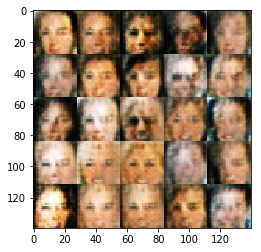

Epoch 1/1... Discriminator Loss: 1.2008... Generator Loss: 0.9486
Epoch 1/1... Discriminator Loss: 1.0898... Generator Loss: 0.7927
Epoch 1/1... Discriminator Loss: 1.0625... Generator Loss: 1.9601
Epoch 1/1... Discriminator Loss: 1.9873... Generator Loss: 0.1959
Epoch 1/1... Discriminator Loss: 0.6680... Generator Loss: 1.2999
Epoch 1/1... Discriminator Loss: 0.8814... Generator Loss: 1.0518
Epoch 1/1... Discriminator Loss: 1.3310... Generator Loss: 0.6016
Epoch 1/1... Discriminator Loss: 1.1649... Generator Loss: 0.6536
Epoch 1/1... Discriminator Loss: 1.1385... Generator Loss: 0.9859
Epoch 1/1... Discriminator Loss: 1.2251... Generator Loss: 0.6398


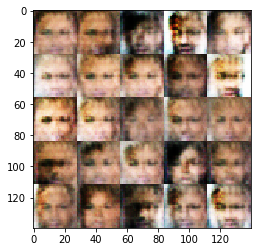

Epoch 1/1... Discriminator Loss: 0.9262... Generator Loss: 1.2450
Epoch 1/1... Discriminator Loss: 0.8172... Generator Loss: 1.8749
Epoch 1/1... Discriminator Loss: 0.8699... Generator Loss: 1.3890
Epoch 1/1... Discriminator Loss: 1.5579... Generator Loss: 0.4484
Epoch 1/1... Discriminator Loss: 1.1301... Generator Loss: 0.7028
Epoch 1/1... Discriminator Loss: 0.7302... Generator Loss: 1.5926
Epoch 1/1... Discriminator Loss: 1.0136... Generator Loss: 0.9126
Epoch 1/1... Discriminator Loss: 0.8489... Generator Loss: 1.6162
Epoch 1/1... Discriminator Loss: 0.7517... Generator Loss: 1.2694
Epoch 1/1... Discriminator Loss: 0.8029... Generator Loss: 1.4694


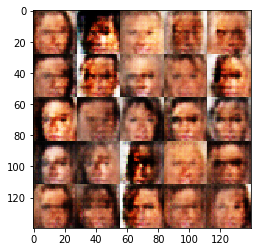

Epoch 1/1... Discriminator Loss: 0.9039... Generator Loss: 0.8090
Epoch 1/1... Discriminator Loss: 1.0181... Generator Loss: 0.7543
Epoch 1/1... Discriminator Loss: 1.2289... Generator Loss: 0.7466
Epoch 1/1... Discriminator Loss: 1.0739... Generator Loss: 0.6464
Epoch 1/1... Discriminator Loss: 0.9924... Generator Loss: 0.9071
Epoch 1/1... Discriminator Loss: 1.5130... Generator Loss: 0.3936
Epoch 1/1... Discriminator Loss: 1.0436... Generator Loss: 0.9328
Epoch 1/1... Discriminator Loss: 1.5237... Generator Loss: 0.3603
Epoch 1/1... Discriminator Loss: 0.8273... Generator Loss: 1.4245
Epoch 1/1... Discriminator Loss: 1.1139... Generator Loss: 0.6957


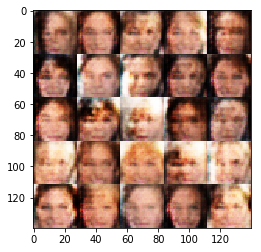

Epoch 1/1... Discriminator Loss: 1.1447... Generator Loss: 0.7433
Epoch 1/1... Discriminator Loss: 1.3345... Generator Loss: 0.7915
Epoch 1/1... Discriminator Loss: 1.3308... Generator Loss: 0.6698
Epoch 1/1... Discriminator Loss: 0.8214... Generator Loss: 1.3731
Epoch 1/1... Discriminator Loss: 2.1057... Generator Loss: 0.2114
Epoch 1/1... Discriminator Loss: 0.7522... Generator Loss: 1.2498
Epoch 1/1... Discriminator Loss: 1.0976... Generator Loss: 1.0531
Epoch 1/1... Discriminator Loss: 0.9146... Generator Loss: 1.6157
Epoch 1/1... Discriminator Loss: 0.6955... Generator Loss: 2.0775
Epoch 1/1... Discriminator Loss: 1.0747... Generator Loss: 0.6825


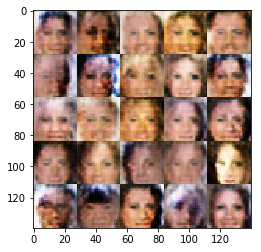

Epoch 1/1... Discriminator Loss: 0.6312... Generator Loss: 1.1977
Epoch 1/1... Discriminator Loss: 0.9158... Generator Loss: 1.6694
Epoch 1/1... Discriminator Loss: 1.0741... Generator Loss: 1.9604
Epoch 1/1... Discriminator Loss: 0.9979... Generator Loss: 0.9272
Epoch 1/1... Discriminator Loss: 1.2440... Generator Loss: 0.6204
Epoch 1/1... Discriminator Loss: 1.4567... Generator Loss: 0.4419
Epoch 1/1... Discriminator Loss: 0.8844... Generator Loss: 1.7333
Epoch 1/1... Discriminator Loss: 0.8993... Generator Loss: 1.2309
Epoch 1/1... Discriminator Loss: 0.9004... Generator Loss: 2.6268
Epoch 1/1... Discriminator Loss: 0.9367... Generator Loss: 1.2354


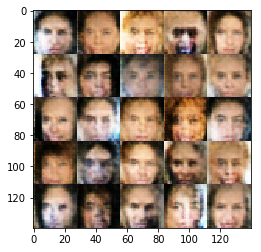

Epoch 1/1... Discriminator Loss: 1.3068... Generator Loss: 1.7812
Epoch 1/1... Discriminator Loss: 0.6530... Generator Loss: 1.2341
Epoch 1/1... Discriminator Loss: 1.9555... Generator Loss: 0.2052
Epoch 1/1... Discriminator Loss: 0.9298... Generator Loss: 1.0860
Epoch 1/1... Discriminator Loss: 0.9297... Generator Loss: 1.3518
Epoch 1/1... Discriminator Loss: 0.9210... Generator Loss: 1.2232
Epoch 1/1... Discriminator Loss: 0.8791... Generator Loss: 1.6325
Epoch 1/1... Discriminator Loss: 0.8256... Generator Loss: 1.2529
Epoch 1/1... Discriminator Loss: 0.5885... Generator Loss: 1.8579
Epoch 1/1... Discriminator Loss: 0.9058... Generator Loss: 0.8569


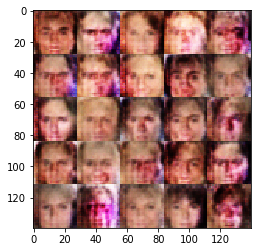

Epoch 1/1... Discriminator Loss: 0.8601... Generator Loss: 1.8995
Epoch 1/1... Discriminator Loss: 1.2832... Generator Loss: 1.0577
Epoch 1/1... Discriminator Loss: 1.0615... Generator Loss: 1.4952
Epoch 1/1... Discriminator Loss: 0.9123... Generator Loss: 0.9327
Epoch 1/1... Discriminator Loss: 0.6506... Generator Loss: 1.3835
Epoch 1/1... Discriminator Loss: 1.3324... Generator Loss: 0.6554
Epoch 1/1... Discriminator Loss: 1.2261... Generator Loss: 1.9436
Epoch 1/1... Discriminator Loss: 1.0539... Generator Loss: 0.9519
Epoch 1/1... Discriminator Loss: 1.2025... Generator Loss: 0.8401
Epoch 1/1... Discriminator Loss: 1.3471... Generator Loss: 0.5144


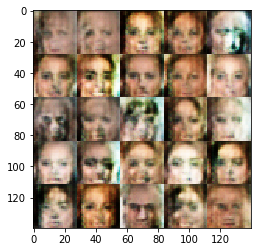

Epoch 1/1... Discriminator Loss: 1.3169... Generator Loss: 0.8669
Epoch 1/1... Discriminator Loss: 0.9494... Generator Loss: 0.8225
Epoch 1/1... Discriminator Loss: 0.8094... Generator Loss: 1.2716
Epoch 1/1... Discriminator Loss: 1.0090... Generator Loss: 0.9927
Epoch 1/1... Discriminator Loss: 1.0749... Generator Loss: 1.1566
Epoch 1/1... Discriminator Loss: 0.7080... Generator Loss: 1.1994
Epoch 1/1... Discriminator Loss: 0.8115... Generator Loss: 1.1978
Epoch 1/1... Discriminator Loss: 0.7780... Generator Loss: 1.1675
Epoch 1/1... Discriminator Loss: 1.1794... Generator Loss: 0.7544
Epoch 1/1... Discriminator Loss: 0.7970... Generator Loss: 0.9406


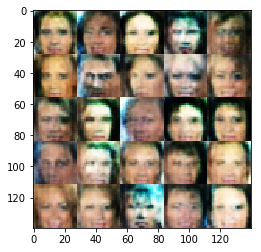

Epoch 1/1... Discriminator Loss: 1.0456... Generator Loss: 0.6843
Epoch 1/1... Discriminator Loss: 0.9764... Generator Loss: 1.2055
Epoch 1/1... Discriminator Loss: 0.9563... Generator Loss: 0.9733
Epoch 1/1... Discriminator Loss: 1.0165... Generator Loss: 1.1529
Epoch 1/1... Discriminator Loss: 0.6401... Generator Loss: 1.5706
Epoch 1/1... Discriminator Loss: 1.0559... Generator Loss: 0.6340
Epoch 1/1... Discriminator Loss: 1.4900... Generator Loss: 0.3973
Epoch 1/1... Discriminator Loss: 1.1384... Generator Loss: 0.6876
Epoch 1/1... Discriminator Loss: 0.9938... Generator Loss: 0.7876
Epoch 1/1... Discriminator Loss: 1.0441... Generator Loss: 0.8829


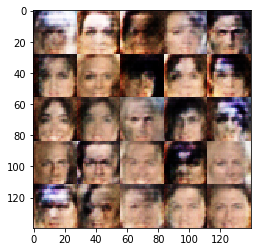

Epoch 1/1... Discriminator Loss: 0.8084... Generator Loss: 1.5727
Epoch 1/1... Discriminator Loss: 0.7246... Generator Loss: 1.2894
Epoch 1/1... Discriminator Loss: 1.1234... Generator Loss: 0.6250
Epoch 1/1... Discriminator Loss: 1.0107... Generator Loss: 0.8625
Epoch 1/1... Discriminator Loss: 0.8393... Generator Loss: 1.7142
Epoch 1/1... Discriminator Loss: 1.1890... Generator Loss: 0.5300
Epoch 1/1... Discriminator Loss: 1.3605... Generator Loss: 0.4045
Epoch 1/1... Discriminator Loss: 0.9639... Generator Loss: 0.8513
Epoch 1/1... Discriminator Loss: 0.7756... Generator Loss: 1.0160
Epoch 1/1... Discriminator Loss: 0.9398... Generator Loss: 1.4443


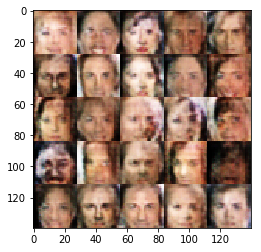

Epoch 1/1... Discriminator Loss: 1.1292... Generator Loss: 1.2766
Epoch 1/1... Discriminator Loss: 1.1201... Generator Loss: 0.8300
Epoch 1/1... Discriminator Loss: 0.9638... Generator Loss: 0.9742
Epoch 1/1... Discriminator Loss: 0.9281... Generator Loss: 0.8235
Epoch 1/1... Discriminator Loss: 1.2080... Generator Loss: 0.5313
Epoch 1/1... Discriminator Loss: 1.0758... Generator Loss: 1.3242
Epoch 1/1... Discriminator Loss: 0.6655... Generator Loss: 1.3110
Epoch 1/1... Discriminator Loss: 1.0821... Generator Loss: 0.7759
Epoch 1/1... Discriminator Loss: 1.1680... Generator Loss: 1.1371
Epoch 1/1... Discriminator Loss: 0.7431... Generator Loss: 1.1836


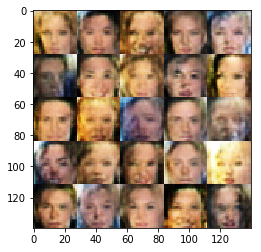

Epoch 1/1... Discriminator Loss: 0.6208... Generator Loss: 1.1579
Epoch 1/1... Discriminator Loss: 1.1253... Generator Loss: 1.5667
Epoch 1/1... Discriminator Loss: 1.1980... Generator Loss: 0.5606
Epoch 1/1... Discriminator Loss: 1.3233... Generator Loss: 0.5793
Epoch 1/1... Discriminator Loss: 0.8775... Generator Loss: 0.9407
Epoch 1/1... Discriminator Loss: 1.5025... Generator Loss: 0.3593
Epoch 1/1... Discriminator Loss: 1.1962... Generator Loss: 0.7654
Epoch 1/1... Discriminator Loss: 1.0319... Generator Loss: 0.8093
Epoch 1/1... Discriminator Loss: 1.0543... Generator Loss: 1.1956
Epoch 1/1... Discriminator Loss: 1.4257... Generator Loss: 1.3946


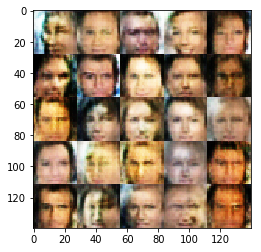

Epoch 1/1... Discriminator Loss: 0.8364... Generator Loss: 1.2163
Epoch 1/1... Discriminator Loss: 1.1230... Generator Loss: 0.7782
Epoch 1/1... Discriminator Loss: 0.8767... Generator Loss: 1.0164
Epoch 1/1... Discriminator Loss: 1.0536... Generator Loss: 0.8689
Epoch 1/1... Discriminator Loss: 1.3077... Generator Loss: 0.4894
Epoch 1/1... Discriminator Loss: 0.8255... Generator Loss: 1.0554
Epoch 1/1... Discriminator Loss: 1.5181... Generator Loss: 0.3849
Epoch 1/1... Discriminator Loss: 1.0476... Generator Loss: 1.1986
Epoch 1/1... Discriminator Loss: 1.0536... Generator Loss: 0.7752
Epoch 1/1... Discriminator Loss: 0.9223... Generator Loss: 1.1926


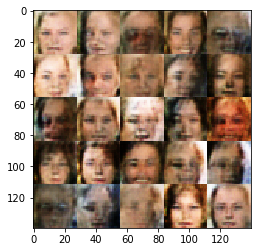

Epoch 1/1... Discriminator Loss: 1.1094... Generator Loss: 1.3615
Epoch 1/1... Discriminator Loss: 1.1642... Generator Loss: 1.0995
Epoch 1/1... Discriminator Loss: 0.8162... Generator Loss: 1.4768
Epoch 1/1... Discriminator Loss: 0.8769... Generator Loss: 1.0584
Epoch 1/1... Discriminator Loss: 1.4575... Generator Loss: 0.4421
Epoch 1/1... Discriminator Loss: 1.4085... Generator Loss: 0.3709
Epoch 1/1... Discriminator Loss: 0.8800... Generator Loss: 1.2546
Epoch 1/1... Discriminator Loss: 0.9236... Generator Loss: 0.9768
Epoch 1/1... Discriminator Loss: 0.9559... Generator Loss: 1.1838
Epoch 1/1... Discriminator Loss: 0.6052... Generator Loss: 1.4732


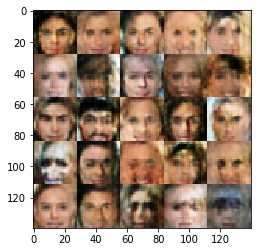

Epoch 1/1... Discriminator Loss: 0.7674... Generator Loss: 1.3024
Epoch 1/1... Discriminator Loss: 0.7855... Generator Loss: 1.5301
Epoch 1/1... Discriminator Loss: 0.9038... Generator Loss: 1.0440
Epoch 1/1... Discriminator Loss: 1.1441... Generator Loss: 0.9996
Epoch 1/1... Discriminator Loss: 1.1234... Generator Loss: 0.9726
Epoch 1/1... Discriminator Loss: 1.0411... Generator Loss: 0.6626
Epoch 1/1... Discriminator Loss: 0.9712... Generator Loss: 1.0992
Epoch 1/1... Discriminator Loss: 0.9332... Generator Loss: 1.2864
Epoch 1/1... Discriminator Loss: 1.2367... Generator Loss: 0.5884
Epoch 1/1... Discriminator Loss: 1.1268... Generator Loss: 0.5637


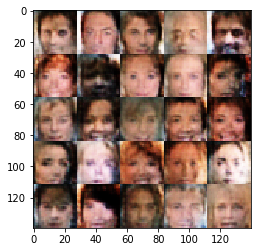

Epoch 1/1... Discriminator Loss: 1.0053... Generator Loss: 0.7643
Epoch 1/1... Discriminator Loss: 1.1039... Generator Loss: 0.8913
Epoch 1/1... Discriminator Loss: 1.0420... Generator Loss: 0.7896
Epoch 1/1... Discriminator Loss: 0.9224... Generator Loss: 0.7938
Epoch 1/1... Discriminator Loss: 1.0246... Generator Loss: 0.9387
Epoch 1/1... Discriminator Loss: 1.0637... Generator Loss: 0.7194
Epoch 1/1... Discriminator Loss: 1.2304... Generator Loss: 0.5205
Epoch 1/1... Discriminator Loss: 0.7715... Generator Loss: 1.2656
Epoch 1/1... Discriminator Loss: 0.9172... Generator Loss: 1.1923
Epoch 1/1... Discriminator Loss: 0.7748... Generator Loss: 1.0291


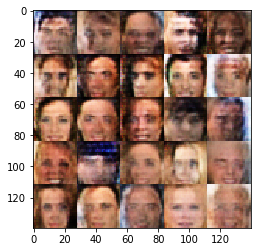

Epoch 1/1... Discriminator Loss: 1.6084... Generator Loss: 0.3407
Epoch 1/1... Discriminator Loss: 0.8623... Generator Loss: 1.1149
Epoch 1/1... Discriminator Loss: 1.0503... Generator Loss: 1.0077
Epoch 1/1... Discriminator Loss: 0.8474... Generator Loss: 1.1196
Epoch 1/1... Discriminator Loss: 1.3151... Generator Loss: 0.4510
Epoch 1/1... Discriminator Loss: 1.2044... Generator Loss: 0.5779
Epoch 1/1... Discriminator Loss: 1.0510... Generator Loss: 1.3061
Epoch 1/1... Discriminator Loss: 0.9786... Generator Loss: 0.7121
Epoch 1/1... Discriminator Loss: 0.9533... Generator Loss: 0.9843
Epoch 1/1... Discriminator Loss: 0.9312... Generator Loss: 0.8280


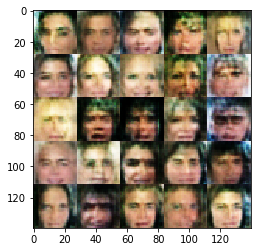

Epoch 1/1... Discriminator Loss: 0.8646... Generator Loss: 1.0045
Epoch 1/1... Discriminator Loss: 1.3161... Generator Loss: 0.4861
Epoch 1/1... Discriminator Loss: 1.0899... Generator Loss: 0.7851
Epoch 1/1... Discriminator Loss: 1.0585... Generator Loss: 0.6783
Epoch 1/1... Discriminator Loss: 1.1080... Generator Loss: 1.0666
Epoch 1/1... Discriminator Loss: 1.1317... Generator Loss: 0.6660
Epoch 1/1... Discriminator Loss: 0.7490... Generator Loss: 1.0115
Epoch 1/1... Discriminator Loss: 1.0616... Generator Loss: 0.6778
Epoch 1/1... Discriminator Loss: 1.3322... Generator Loss: 0.7618
Epoch 1/1... Discriminator Loss: 1.1918... Generator Loss: 0.6098


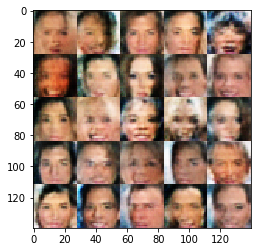

Epoch 1/1... Discriminator Loss: 1.0910... Generator Loss: 1.0701
Epoch 1/1... Discriminator Loss: 0.8784... Generator Loss: 1.2574
Epoch 1/1... Discriminator Loss: 1.0237... Generator Loss: 0.8003
Epoch 1/1... Discriminator Loss: 0.9908... Generator Loss: 1.1365
Epoch 1/1... Discriminator Loss: 0.9598... Generator Loss: 0.9203
Epoch 1/1... Discriminator Loss: 0.9101... Generator Loss: 0.9707
Epoch 1/1... Discriminator Loss: 0.8659... Generator Loss: 1.0527
Epoch 1/1... Discriminator Loss: 1.3064... Generator Loss: 1.1374
Epoch 1/1... Discriminator Loss: 0.9938... Generator Loss: 0.8609
Epoch 1/1... Discriminator Loss: 1.0036... Generator Loss: 0.9687


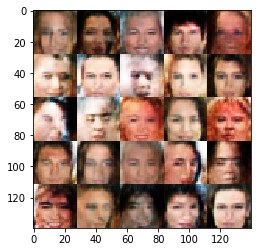

Epoch 1/1... Discriminator Loss: 0.9337... Generator Loss: 1.2881
Epoch 1/1... Discriminator Loss: 1.1080... Generator Loss: 0.8464
Epoch 1/1... Discriminator Loss: 1.1257... Generator Loss: 0.8862
Epoch 1/1... Discriminator Loss: 0.9040... Generator Loss: 1.2862
Epoch 1/1... Discriminator Loss: 0.7090... Generator Loss: 1.4739
Epoch 1/1... Discriminator Loss: 1.2727... Generator Loss: 0.9663
Epoch 1/1... Discriminator Loss: 0.8326... Generator Loss: 0.9938
Epoch 1/1... Discriminator Loss: 1.4023... Generator Loss: 1.0382
Epoch 1/1... Discriminator Loss: 0.9687... Generator Loss: 1.2159
Epoch 1/1... Discriminator Loss: 1.2682... Generator Loss: 1.2931


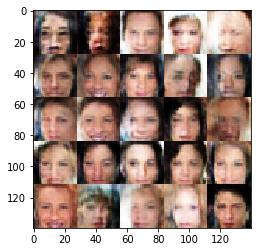

Epoch 1/1... Discriminator Loss: 0.8301... Generator Loss: 1.1493
Epoch 1/1... Discriminator Loss: 0.7428... Generator Loss: 1.0143
Epoch 1/1... Discriminator Loss: 1.4571... Generator Loss: 0.5173
Epoch 1/1... Discriminator Loss: 1.0935... Generator Loss: 1.0066
Epoch 1/1... Discriminator Loss: 0.8064... Generator Loss: 0.9147
Epoch 1/1... Discriminator Loss: 0.8848... Generator Loss: 1.4419
Epoch 1/1... Discriminator Loss: 1.1988... Generator Loss: 1.0310
Epoch 1/1... Discriminator Loss: 1.0453... Generator Loss: 1.2403
Epoch 1/1... Discriminator Loss: 1.3617... Generator Loss: 0.3790
Epoch 1/1... Discriminator Loss: 0.9756... Generator Loss: 0.8432


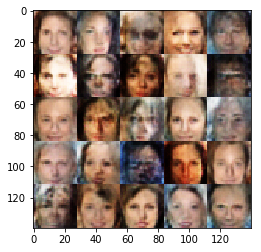

Epoch 1/1... Discriminator Loss: 1.1771... Generator Loss: 1.4244
Epoch 1/1... Discriminator Loss: 1.1339... Generator Loss: 0.6975
Epoch 1/1... Discriminator Loss: 1.6908... Generator Loss: 0.2908
Epoch 1/1... Discriminator Loss: 0.9069... Generator Loss: 0.8411
Epoch 1/1... Discriminator Loss: 1.0377... Generator Loss: 0.7939
Epoch 1/1... Discriminator Loss: 0.9566... Generator Loss: 1.4142
Epoch 1/1... Discriminator Loss: 1.1302... Generator Loss: 0.8078
Epoch 1/1... Discriminator Loss: 1.1018... Generator Loss: 0.7449
Epoch 1/1... Discriminator Loss: 1.1396... Generator Loss: 0.7084
Epoch 1/1... Discriminator Loss: 0.9696... Generator Loss: 1.0312


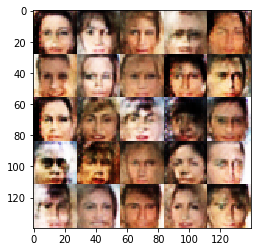

Epoch 1/1... Discriminator Loss: 1.1299... Generator Loss: 0.8557
Epoch 1/1... Discriminator Loss: 1.1143... Generator Loss: 0.7225
Epoch 1/1... Discriminator Loss: 0.8020... Generator Loss: 0.9528
Epoch 1/1... Discriminator Loss: 1.0866... Generator Loss: 0.7195
Epoch 1/1... Discriminator Loss: 0.9492... Generator Loss: 0.9044
Epoch 1/1... Discriminator Loss: 1.0475... Generator Loss: 0.7741
Epoch 1/1... Discriminator Loss: 1.0827... Generator Loss: 0.7127
Epoch 1/1... Discriminator Loss: 1.1813... Generator Loss: 0.6803
Epoch 1/1... Discriminator Loss: 1.0141... Generator Loss: 1.0870
Epoch 1/1... Discriminator Loss: 0.7936... Generator Loss: 1.2348


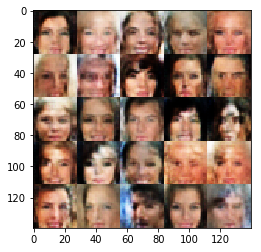

Epoch 1/1... Discriminator Loss: 1.1422... Generator Loss: 1.0337
Epoch 1/1... Discriminator Loss: 1.3144... Generator Loss: 0.5884
Epoch 1/1... Discriminator Loss: 0.9773... Generator Loss: 1.0686
Epoch 1/1... Discriminator Loss: 1.1597... Generator Loss: 0.5848
Epoch 1/1... Discriminator Loss: 1.0155... Generator Loss: 0.8764
Epoch 1/1... Discriminator Loss: 1.1609... Generator Loss: 0.6668
Epoch 1/1... Discriminator Loss: 1.2388... Generator Loss: 1.1766
Epoch 1/1... Discriminator Loss: 1.2827... Generator Loss: 1.1980
Epoch 1/1... Discriminator Loss: 0.9730... Generator Loss: 0.7263
Epoch 1/1... Discriminator Loss: 1.1764... Generator Loss: 0.6446


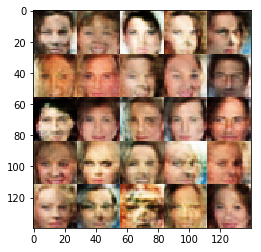

Epoch 1/1... Discriminator Loss: 1.0889... Generator Loss: 0.7725
Epoch 1/1... Discriminator Loss: 1.1876... Generator Loss: 0.6239
Epoch 1/1... Discriminator Loss: 0.9749... Generator Loss: 0.9179
Epoch 1/1... Discriminator Loss: 1.0155... Generator Loss: 0.8660
Epoch 1/1... Discriminator Loss: 0.9216... Generator Loss: 0.8706
Epoch 1/1... Discriminator Loss: 0.9255... Generator Loss: 1.0365
Epoch 1/1... Discriminator Loss: 0.7242... Generator Loss: 1.3679
Epoch 1/1... Discriminator Loss: 0.9016... Generator Loss: 0.9442
Epoch 1/1... Discriminator Loss: 0.8771... Generator Loss: 0.9162
Epoch 1/1... Discriminator Loss: 1.1261... Generator Loss: 0.7289


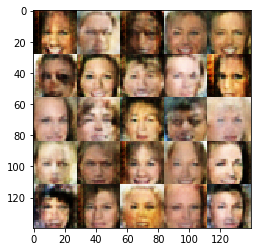

Epoch 1/1... Discriminator Loss: 0.8038... Generator Loss: 1.1220
Epoch 1/1... Discriminator Loss: 0.7456... Generator Loss: 1.1312
Epoch 1/1... Discriminator Loss: 1.0543... Generator Loss: 0.7174
Epoch 1/1... Discriminator Loss: 1.0700... Generator Loss: 0.7598
Epoch 1/1... Discriminator Loss: 0.8520... Generator Loss: 0.9775
Epoch 1/1... Discriminator Loss: 0.8326... Generator Loss: 0.9135
Epoch 1/1... Discriminator Loss: 0.7813... Generator Loss: 0.9332
Epoch 1/1... Discriminator Loss: 1.0165... Generator Loss: 0.8096
Epoch 1/1... Discriminator Loss: 0.8991... Generator Loss: 1.1658
Epoch 1/1... Discriminator Loss: 0.9342... Generator Loss: 0.8493


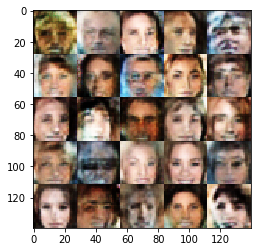

Epoch 1/1... Discriminator Loss: 1.7412... Generator Loss: 0.2794
Epoch 1/1... Discriminator Loss: 1.0323... Generator Loss: 0.9063
Epoch 1/1... Discriminator Loss: 1.4189... Generator Loss: 0.4081
Epoch 1/1... Discriminator Loss: 0.8647... Generator Loss: 1.2357
Epoch 1/1... Discriminator Loss: 1.1162... Generator Loss: 0.7611
Epoch 1/1... Discriminator Loss: 1.0144... Generator Loss: 0.9355
Epoch 1/1... Discriminator Loss: 1.1638... Generator Loss: 1.0299
Epoch 1/1... Discriminator Loss: 0.9605... Generator Loss: 0.9270
Epoch 1/1... Discriminator Loss: 1.1714... Generator Loss: 0.5660
Epoch 1/1... Discriminator Loss: 0.9233... Generator Loss: 1.0505


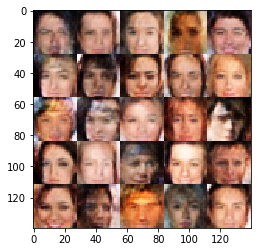

Epoch 1/1... Discriminator Loss: 1.3613... Generator Loss: 0.5351
Epoch 1/1... Discriminator Loss: 1.1987... Generator Loss: 0.5568
Epoch 1/1... Discriminator Loss: 1.1594... Generator Loss: 0.7381
Epoch 1/1... Discriminator Loss: 1.0010... Generator Loss: 0.8414
Epoch 1/1... Discriminator Loss: 1.0763... Generator Loss: 0.7895
Epoch 1/1... Discriminator Loss: 1.2008... Generator Loss: 0.9222
Epoch 1/1... Discriminator Loss: 0.8178... Generator Loss: 0.9521
Epoch 1/1... Discriminator Loss: 1.2583... Generator Loss: 0.5536
Epoch 1/1... Discriminator Loss: 0.9189... Generator Loss: 0.8904
Epoch 1/1... Discriminator Loss: 1.1406... Generator Loss: 0.7337


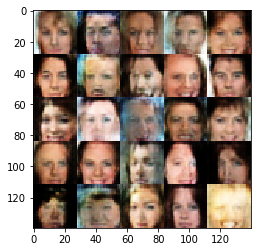

Epoch 1/1... Discriminator Loss: 0.7951... Generator Loss: 1.0281
Epoch 1/1... Discriminator Loss: 1.2182... Generator Loss: 1.5676
Epoch 1/1... Discriminator Loss: 0.9609... Generator Loss: 1.2063
Epoch 1/1... Discriminator Loss: 1.3386... Generator Loss: 0.4638
Epoch 1/1... Discriminator Loss: 1.0141... Generator Loss: 0.7048
Epoch 1/1... Discriminator Loss: 1.1933... Generator Loss: 0.6764
Epoch 1/1... Discriminator Loss: 0.7157... Generator Loss: 2.1901
Epoch 1/1... Discriminator Loss: 0.8624... Generator Loss: 1.0187
Epoch 1/1... Discriminator Loss: 0.8660... Generator Loss: 0.7869
Epoch 1/1... Discriminator Loss: 1.0049... Generator Loss: 0.8233


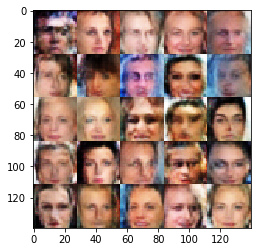

Epoch 1/1... Discriminator Loss: 0.9321... Generator Loss: 1.2046
Epoch 1/1... Discriminator Loss: 1.0724... Generator Loss: 0.6032
Epoch 1/1... Discriminator Loss: 1.0323... Generator Loss: 0.7588
Epoch 1/1... Discriminator Loss: 1.0322... Generator Loss: 0.7175
Epoch 1/1... Discriminator Loss: 1.2720... Generator Loss: 0.5386
Epoch 1/1... Discriminator Loss: 1.1464... Generator Loss: 0.8369
Epoch 1/1... Discriminator Loss: 1.2229... Generator Loss: 1.0880
Epoch 1/1... Discriminator Loss: 0.8409... Generator Loss: 1.0650
Epoch 1/1... Discriminator Loss: 0.9916... Generator Loss: 1.0283
Epoch 1/1... Discriminator Loss: 0.9571... Generator Loss: 1.0627


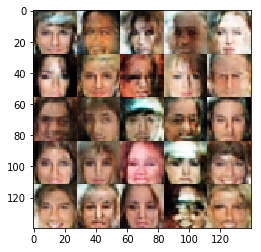

Epoch 1/1... Discriminator Loss: 0.9995... Generator Loss: 0.9282
Epoch 1/1... Discriminator Loss: 0.6940... Generator Loss: 1.3012
Epoch 1/1... Discriminator Loss: 0.8762... Generator Loss: 1.1113
Epoch 1/1... Discriminator Loss: 0.8469... Generator Loss: 1.5682
Epoch 1/1... Discriminator Loss: 0.8024... Generator Loss: 0.9438
Epoch 1/1... Discriminator Loss: 0.7234... Generator Loss: 1.6273
Epoch 1/1... Discriminator Loss: 1.0862... Generator Loss: 1.1678
Epoch 1/1... Discriminator Loss: 0.8629... Generator Loss: 1.1444
Epoch 1/1... Discriminator Loss: 1.3181... Generator Loss: 0.4431
Epoch 1/1... Discriminator Loss: 1.0980... Generator Loss: 0.9813


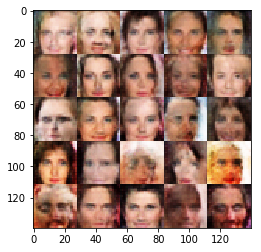

Epoch 1/1... Discriminator Loss: 0.7918... Generator Loss: 1.0448
Epoch 1/1... Discriminator Loss: 1.5424... Generator Loss: 0.4082
Epoch 1/1... Discriminator Loss: 1.1445... Generator Loss: 0.8169
Epoch 1/1... Discriminator Loss: 1.1064... Generator Loss: 0.6807
Epoch 1/1... Discriminator Loss: 1.2854... Generator Loss: 0.6072
Epoch 1/1... Discriminator Loss: 1.0548... Generator Loss: 0.8952
Epoch 1/1... Discriminator Loss: 0.8807... Generator Loss: 1.0871
Epoch 1/1... Discriminator Loss: 1.2471... Generator Loss: 0.6049
Epoch 1/1... Discriminator Loss: 1.1914... Generator Loss: 0.8695
Epoch 1/1... Discriminator Loss: 0.8686... Generator Loss: 1.2275


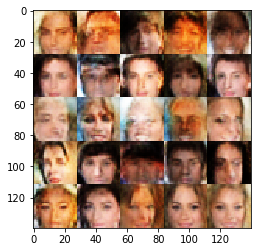

Epoch 1/1... Discriminator Loss: 1.4553... Generator Loss: 0.7939
Epoch 1/1... Discriminator Loss: 0.9556... Generator Loss: 0.9974
Epoch 1/1... Discriminator Loss: 1.0623... Generator Loss: 1.0254
Epoch 1/1... Discriminator Loss: 1.0330... Generator Loss: 0.9699
Epoch 1/1... Discriminator Loss: 1.1542... Generator Loss: 0.6659
Epoch 1/1... Discriminator Loss: 0.9403... Generator Loss: 0.9348
Epoch 1/1... Discriminator Loss: 1.3374... Generator Loss: 0.6049
Epoch 1/1... Discriminator Loss: 0.7820... Generator Loss: 1.0163
Epoch 1/1... Discriminator Loss: 0.9546... Generator Loss: 1.0233
Epoch 1/1... Discriminator Loss: 0.6166... Generator Loss: 1.5681


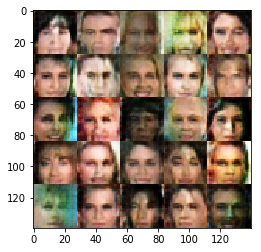

Epoch 1/1... Discriminator Loss: 1.0429... Generator Loss: 0.9870
Epoch 1/1... Discriminator Loss: 0.8200... Generator Loss: 1.2189
Epoch 1/1... Discriminator Loss: 1.0292... Generator Loss: 0.6395
Epoch 1/1... Discriminator Loss: 1.1314... Generator Loss: 1.0135
Epoch 1/1... Discriminator Loss: 1.1054... Generator Loss: 0.7701
Epoch 1/1... Discriminator Loss: 1.1088... Generator Loss: 0.7226
Epoch 1/1... Discriminator Loss: 1.3360... Generator Loss: 0.5015
Epoch 1/1... Discriminator Loss: 1.2074... Generator Loss: 0.5766
Epoch 1/1... Discriminator Loss: 1.1041... Generator Loss: 0.6782
Epoch 1/1... Discriminator Loss: 1.1054... Generator Loss: 0.8775


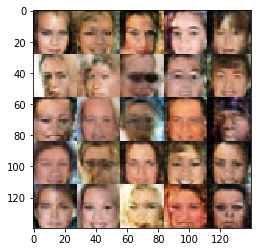

Epoch 1/1... Discriminator Loss: 1.0132... Generator Loss: 0.7766
Epoch 1/1... Discriminator Loss: 0.9543... Generator Loss: 0.9279
Epoch 1/1... Discriminator Loss: 1.1986... Generator Loss: 1.0477
Epoch 1/1... Discriminator Loss: 1.4809... Generator Loss: 0.4465
Epoch 1/1... Discriminator Loss: 1.1027... Generator Loss: 1.0605
Epoch 1/1... Discriminator Loss: 1.0752... Generator Loss: 0.7013
Epoch 1/1... Discriminator Loss: 1.0946... Generator Loss: 0.9269
Epoch 1/1... Discriminator Loss: 1.3214... Generator Loss: 0.5039
Epoch 1/1... Discriminator Loss: 1.2467... Generator Loss: 0.5394
Epoch 1/1... Discriminator Loss: 0.8031... Generator Loss: 1.2518


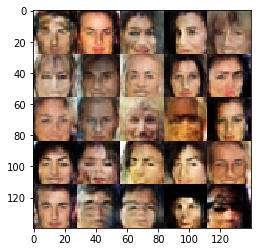

Epoch 1/1... Discriminator Loss: 1.2638... Generator Loss: 0.4690
Epoch 1/1... Discriminator Loss: 1.2686... Generator Loss: 0.9724
Epoch 1/1... Discriminator Loss: 1.3987... Generator Loss: 0.8801
Epoch 1/1... Discriminator Loss: 0.8738... Generator Loss: 0.9636
Epoch 1/1... Discriminator Loss: 1.0825... Generator Loss: 1.2326
Epoch 1/1... Discriminator Loss: 1.3202... Generator Loss: 2.0227
Epoch 1/1... Discriminator Loss: 0.9987... Generator Loss: 0.9235
Epoch 1/1... Discriminator Loss: 1.0876... Generator Loss: 1.0435
Epoch 1/1... Discriminator Loss: 1.1736... Generator Loss: 1.0820
Epoch 1/1... Discriminator Loss: 1.3144... Generator Loss: 1.5037


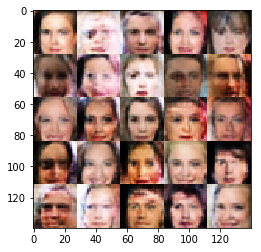

Epoch 1/1... Discriminator Loss: 1.1187... Generator Loss: 1.0107
Epoch 1/1... Discriminator Loss: 1.1342... Generator Loss: 0.8076
Epoch 1/1... Discriminator Loss: 1.0805... Generator Loss: 0.7707
Epoch 1/1... Discriminator Loss: 1.0888... Generator Loss: 1.4289
Epoch 1/1... Discriminator Loss: 1.1330... Generator Loss: 0.6668
Epoch 1/1... Discriminator Loss: 1.0256... Generator Loss: 0.7892
Epoch 1/1... Discriminator Loss: 1.0184... Generator Loss: 0.7313
Epoch 1/1... Discriminator Loss: 1.3235... Generator Loss: 0.6139
Epoch 1/1... Discriminator Loss: 1.0193... Generator Loss: 0.7667
Epoch 1/1... Discriminator Loss: 0.9695... Generator Loss: 0.9718


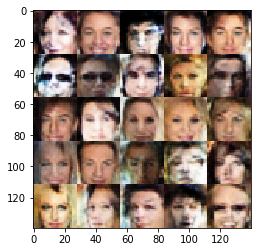

Epoch 1/1... Discriminator Loss: 0.7638... Generator Loss: 1.3516
Epoch 1/1... Discriminator Loss: 1.6993... Generator Loss: 0.2683
Epoch 1/1... Discriminator Loss: 1.2054... Generator Loss: 1.0868
Epoch 1/1... Discriminator Loss: 1.0069... Generator Loss: 0.6651
Epoch 1/1... Discriminator Loss: 0.9915... Generator Loss: 0.9902
Epoch 1/1... Discriminator Loss: 1.1579... Generator Loss: 0.7890
Epoch 1/1... Discriminator Loss: 0.9290... Generator Loss: 1.1228
Epoch 1/1... Discriminator Loss: 1.1447... Generator Loss: 1.0578
Epoch 1/1... Discriminator Loss: 1.2488... Generator Loss: 0.5392
Epoch 1/1... Discriminator Loss: 0.7521... Generator Loss: 1.1553


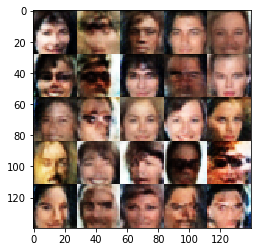

Epoch 1/1... Discriminator Loss: 0.8013... Generator Loss: 1.4744
Epoch 1/1... Discriminator Loss: 0.9260... Generator Loss: 0.9071
Epoch 1/1... Discriminator Loss: 0.8352... Generator Loss: 0.9495
Epoch 1/1... Discriminator Loss: 0.9246... Generator Loss: 0.8020
Epoch 1/1... Discriminator Loss: 1.1013... Generator Loss: 0.9142
Epoch 1/1... Discriminator Loss: 1.5165... Generator Loss: 0.4337
Epoch 1/1... Discriminator Loss: 1.1041... Generator Loss: 0.9934
Epoch 1/1... Discriminator Loss: 1.1661... Generator Loss: 0.6651
Epoch 1/1... Discriminator Loss: 1.0478... Generator Loss: 0.8069
Epoch 1/1... Discriminator Loss: 1.8471... Generator Loss: 0.2471


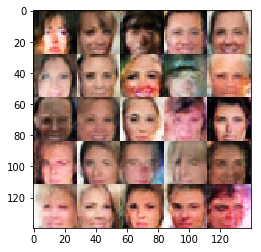

Epoch 1/1... Discriminator Loss: 0.8978... Generator Loss: 0.9255
Epoch 1/1... Discriminator Loss: 0.6279... Generator Loss: 1.4779
Epoch 1/1... Discriminator Loss: 0.9781... Generator Loss: 0.7693
Epoch 1/1... Discriminator Loss: 0.7791... Generator Loss: 1.0933
Epoch 1/1... Discriminator Loss: 1.0940... Generator Loss: 1.0071
Epoch 1/1... Discriminator Loss: 1.1400... Generator Loss: 0.7006
Epoch 1/1... Discriminator Loss: 1.0908... Generator Loss: 0.7371
Epoch 1/1... Discriminator Loss: 1.1295... Generator Loss: 0.8945
Epoch 1/1... Discriminator Loss: 1.3642... Generator Loss: 0.5863
Epoch 1/1... Discriminator Loss: 1.1336... Generator Loss: 0.7172


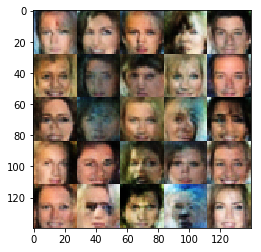

Epoch 1/1... Discriminator Loss: 1.3149... Generator Loss: 0.4344
Epoch 1/1... Discriminator Loss: 1.0662... Generator Loss: 0.6982
Epoch 1/1... Discriminator Loss: 1.0878... Generator Loss: 0.8073
Epoch 1/1... Discriminator Loss: 1.1083... Generator Loss: 0.8616
Epoch 1/1... Discriminator Loss: 0.8616... Generator Loss: 1.0032
Epoch 1/1... Discriminator Loss: 1.0355... Generator Loss: 0.7740
Epoch 1/1... Discriminator Loss: 1.1546... Generator Loss: 0.6821
Epoch 1/1... Discriminator Loss: 1.3763... Generator Loss: 0.6365
Epoch 1/1... Discriminator Loss: 1.1803... Generator Loss: 0.5139
Epoch 1/1... Discriminator Loss: 0.9645... Generator Loss: 0.7157


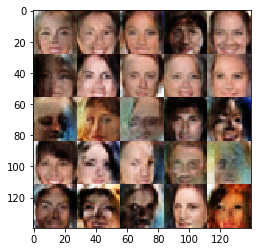

Epoch 1/1... Discriminator Loss: 1.0713... Generator Loss: 0.6227
Epoch 1/1... Discriminator Loss: 0.9337... Generator Loss: 1.1527
Epoch 1/1... Discriminator Loss: 0.9312... Generator Loss: 1.9434
Epoch 1/1... Discriminator Loss: 1.0785... Generator Loss: 0.7100
Epoch 1/1... Discriminator Loss: 1.1636... Generator Loss: 0.6290
Epoch 1/1... Discriminator Loss: 1.0318... Generator Loss: 0.9293
Epoch 1/1... Discriminator Loss: 1.0741... Generator Loss: 0.7089
Epoch 1/1... Discriminator Loss: 1.0809... Generator Loss: 0.7472
Epoch 1/1... Discriminator Loss: 1.2005... Generator Loss: 0.5749
Epoch 1/1... Discriminator Loss: 1.1433... Generator Loss: 0.8013


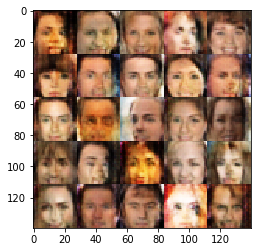

Epoch 1/1... Discriminator Loss: 0.9386... Generator Loss: 0.9602
Epoch 1/1... Discriminator Loss: 1.2652... Generator Loss: 0.7205
Epoch 1/1... Discriminator Loss: 1.3019... Generator Loss: 0.5654
Epoch 1/1... Discriminator Loss: 1.2497... Generator Loss: 0.6583
Epoch 1/1... Discriminator Loss: 1.1506... Generator Loss: 1.1359
Epoch 1/1... Discriminator Loss: 1.1096... Generator Loss: 0.7337
Epoch 1/1... Discriminator Loss: 1.0117... Generator Loss: 0.8613
Epoch 1/1... Discriminator Loss: 1.1542... Generator Loss: 0.6470
Epoch 1/1... Discriminator Loss: 1.5350... Generator Loss: 0.3672
Epoch 1/1... Discriminator Loss: 1.0597... Generator Loss: 0.7573


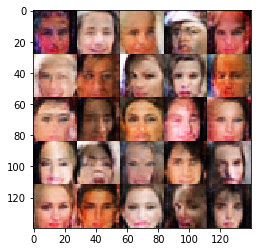

Epoch 1/1... Discriminator Loss: 0.8854... Generator Loss: 1.2950
Epoch 1/1... Discriminator Loss: 1.1045... Generator Loss: 0.7143
Epoch 1/1... Discriminator Loss: 1.0325... Generator Loss: 0.8894
Epoch 1/1... Discriminator Loss: 1.2861... Generator Loss: 0.4895
Epoch 1/1... Discriminator Loss: 1.0984... Generator Loss: 0.9542
Epoch 1/1... Discriminator Loss: 1.2499... Generator Loss: 0.5321
Epoch 1/1... Discriminator Loss: 0.9923... Generator Loss: 0.6046
Epoch 1/1... Discriminator Loss: 1.0996... Generator Loss: 0.7906
Epoch 1/1... Discriminator Loss: 1.3607... Generator Loss: 0.4978
Epoch 1/1... Discriminator Loss: 1.0291... Generator Loss: 0.7028


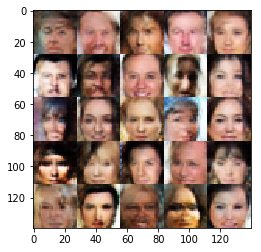

Epoch 1/1... Discriminator Loss: 0.7915... Generator Loss: 1.1100
Epoch 1/1... Discriminator Loss: 1.1679... Generator Loss: 0.9370
Epoch 1/1... Discriminator Loss: 1.1745... Generator Loss: 0.7619
Epoch 1/1... Discriminator Loss: 1.3307... Generator Loss: 0.5492
Epoch 1/1... Discriminator Loss: 1.1778... Generator Loss: 0.8801
Epoch 1/1... Discriminator Loss: 0.9824... Generator Loss: 0.9172
Epoch 1/1... Discriminator Loss: 0.7525... Generator Loss: 1.1836
Epoch 1/1... Discriminator Loss: 1.2459... Generator Loss: 0.6825
Epoch 1/1... Discriminator Loss: 1.1884... Generator Loss: 0.6993
Epoch 1/1... Discriminator Loss: 0.8881... Generator Loss: 1.1789


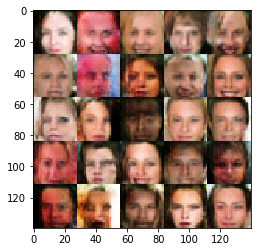

Epoch 1/1... Discriminator Loss: 0.8624... Generator Loss: 0.9562
Epoch 1/1... Discriminator Loss: 1.1495... Generator Loss: 0.7973
Epoch 1/1... Discriminator Loss: 0.9279... Generator Loss: 0.9882
Epoch 1/1... Discriminator Loss: 1.0314... Generator Loss: 0.8036
Epoch 1/1... Discriminator Loss: 1.3674... Generator Loss: 0.5218
Epoch 1/1... Discriminator Loss: 0.8926... Generator Loss: 1.3053
Epoch 1/1... Discriminator Loss: 1.0929... Generator Loss: 0.7136
Epoch 1/1... Discriminator Loss: 1.0743... Generator Loss: 0.7180
Epoch 1/1... Discriminator Loss: 1.0638... Generator Loss: 0.8756
Epoch 1/1... Discriminator Loss: 1.1383... Generator Loss: 0.8667


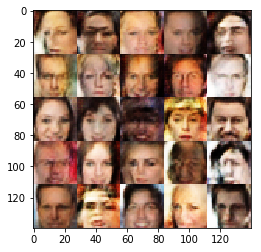

Epoch 1/1... Discriminator Loss: 1.0426... Generator Loss: 0.7169
Epoch 1/1... Discriminator Loss: 0.8269... Generator Loss: 1.0661
Epoch 1/1... Discriminator Loss: 1.0916... Generator Loss: 0.7968
Epoch 1/1... Discriminator Loss: 1.0661... Generator Loss: 1.2342
Epoch 1/1... Discriminator Loss: 0.9399... Generator Loss: 0.8571
Epoch 1/1... Discriminator Loss: 0.8751... Generator Loss: 0.9465
Epoch 1/1... Discriminator Loss: 1.5366... Generator Loss: 0.2925
Epoch 1/1... Discriminator Loss: 1.1461... Generator Loss: 0.8046
Epoch 1/1... Discriminator Loss: 0.9341... Generator Loss: 0.9536
Epoch 1/1... Discriminator Loss: 1.3228... Generator Loss: 0.4978


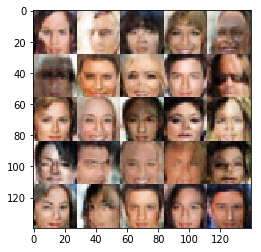

Epoch 1/1... Discriminator Loss: 1.2661... Generator Loss: 0.4984
Epoch 1/1... Discriminator Loss: 1.0871... Generator Loss: 0.6456
Epoch 1/1... Discriminator Loss: 1.1716... Generator Loss: 0.6574
Epoch 1/1... Discriminator Loss: 0.6595... Generator Loss: 1.3414
Epoch 1/1... Discriminator Loss: 1.1673... Generator Loss: 0.6288
Epoch 1/1... Discriminator Loss: 1.1113... Generator Loss: 0.9523
Epoch 1/1... Discriminator Loss: 1.0010... Generator Loss: 0.8880
Epoch 1/1... Discriminator Loss: 1.3303... Generator Loss: 1.8666
Epoch 1/1... Discriminator Loss: 1.1434... Generator Loss: 0.7178
Epoch 1/1... Discriminator Loss: 1.1297... Generator Loss: 0.7595


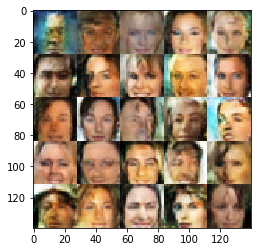

Epoch 1/1... Discriminator Loss: 1.0769... Generator Loss: 1.0138
Epoch 1/1... Discriminator Loss: 1.1308... Generator Loss: 0.7625
Epoch 1/1... Discriminator Loss: 0.9986... Generator Loss: 0.9518


In [13]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.